In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Read Files

In [4]:
def read_files(freq_band):
    scpc = "_scpc_channel_data"
    mcc = "_mcc_packet_lost"
    sat = "_sat_packet_lost"

    data = pd.read_csv(freq_band + scpc + '.txt', sep=",", header=0)
    real = data.head()

    f = open(freq_band + mcc + '.txt', "r")
    print(f.read()) 
    f.close()

    f = open(freq_band + sat + '.txt', "r")
    print(f.read()) 
    f.close()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    atmosl_uplink = []
    atmosl_downlink = []

    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            atmosl_uplink.append(data.iloc[i,1])
        else:
            atmosl_downlink.append(data.iloc[i,1])

    print(f"Average uplink Atmospheric loss (dB): {np.average(atmosl_uplink):.3f}")
    print(f"Stddev uplink Atmospheric loss (dB): {np.std(atmosl_uplink):.3f}")

    print(f"Average downlink Atmospheric loss (dB): {np.average(atmosl_downlink):.3f}")
    print(f"Stddev downlink Atmospheric loss (dB): {np.std(atmosl_downlink):.3f}")
    print()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    fspl_uplink = []
    fspl_downlink = []
    
    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            fspl_uplink.append(data.iloc[i,2])
        else:
            fspl_downlink.append(data.iloc[i,2])

    print(f"Average uplink FSPL (dB): {np.average(fspl_uplink):.3f}")
    print(f"Stddev uplink FSPL (dB): {np.std(fspl_uplink):.3f}")

    print(f"Average downlink FSPL (dB): {np.average(fspl_downlink):.3f}")
    print(f"Stddev downlink FSPL (dB): {np.std(fspl_downlink):.3f}")
    print()

    # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
    power_dBm_uplink = []
    power_dBm_downlink = []
    
    for i in range(len(data)):
        if str(data.iloc[i,0])[-2] == '.':
            power_dBm_uplink.append(data.iloc[i,3])
        else:
            power_dBm_downlink.append(data.iloc[i,3])

    print(f"Average uplink power (dBm): {np.average(power_dBm_uplink):.3f}")
    print(f"Stddev uplink power (dBm): {np.std(power_dBm_uplink):.3f}")

    print(f"Average downlink power (dBm): {np.average(power_dBm_downlink):.3f}")
    print(f"Stddev downlink power (dBm): {np.std(power_dBm_downlink):.3f}")


def read_files_v2(freq_band):
    mcc = "_mcc_packet_lost"
    sat = "_sat_packet_lost"

    f = open(freq_band + mcc + '.txt', "r")
    print(f.read()) 
    f.close()

    f = open(freq_band + sat + '.txt', "r")
    print(f.read()) 
    f.close()

    scpc_file = freq_band + "_scpc_channel_data.txt"
    raw_scpc_data = pd.read_csv(scpc_file, sep=",", header=0)
    ul_scpc_data = raw_scpc_data[~raw_scpc_data['simTime'].astype(str).str.contains("000")]

    weather_file = freq_band + "_mcc_weather_data.txt"
    raw_weather_data = pd.read_csv(weather_file, sep=",", header=0)
    ul_weather_data = raw_weather_data[~raw_weather_data['simTime'].astype(str).str.contains("0001")]

    dl_scpc_data = raw_scpc_data[raw_scpc_data['simTime'].astype(str).str.contains("000")]

    num_mccs = ul_weather_data['MCCIndex'].max() + 1

    ul_weather_loss = ul_scpc_data['rainLoss_dB'].values + \
                        ul_scpc_data['cloudLoss_dB'].values
    ul_rain_loss = ul_scpc_data['rainLoss_dB'].values
    ul_cloud_loss = ul_scpc_data['cloudLoss_dB'].values
    ul_fspl = ul_scpc_data['fspl_dB'].values

    dl_weather_loss = dl_scpc_data['rainLoss_dB'].values + \
                    dl_scpc_data['cloudLoss_dB'].values
    dl_rain_loss = dl_scpc_data['rainLoss_dB'].values
    dl_cloud_loss = dl_scpc_data['cloudLoss_dB'].values 
    dl_fspl = dl_scpc_data['fspl_dB'].values

    print("FOR ALL MCCs")
    print()

    print("UPLINK")
    print()

    print(f"Average uplink weather loss (dB): {np.average(ul_weather_loss):.3f}")
    print(f"Stddev uplink weather loss (dB): {np.std(ul_weather_loss):.3f}")
    print()

    print(f"Average uplink rain loss (dB): {np.average(ul_rain_loss):.3f}")
    print(f"Stddev uplink rain loss (dB): {np.std(ul_rain_loss):.3f}")
    print()

    print(f"Average uplink cloud loss (dB): {np.average(ul_cloud_loss):.3f}")
    print(f"Stddev uplink cloud loss (dB): {np.std(ul_cloud_loss):.3f}")
    print()

    print(f"Average uplink FSPL (dB): {np.average(ul_fspl):.3f}")
    print(f"Stddev uplink FSPL (dB): {np.std(ul_fspl):.3f}")
    print()

    try:
        print(f"Min uplink FSPL (dB): {min(ul_fspl):.3f}")
        print(f"Max uplink FSPL (dB): {max(ul_fspl):.3f}")
        print()
    except:
        print("no data")
        print()

    print("DOWNLINK")
    print()

    print(f"Average downlink weather loss (dB): {np.average(dl_weather_loss):.3f}")
    print(f"Stddev downlink weather loss (dB): {np.std(dl_weather_loss):.3f}")
    print()

    print(f"Average downlink rain loss (dB): {np.average(dl_rain_loss):.3f}")
    print(f"Stddev downlink rain loss (dB): {np.std(dl_rain_loss):.3f}")
    print()

    print(f"Average downlink cloud loss (dB): {np.average(dl_cloud_loss):.3f}")
    print(f"Stddev downlink cloud loss (dB): {np.std(dl_cloud_loss):.3f}")
    print()

    print(f"Average downlink FSPL (dB): {np.average(dl_fspl):.3f}")
    print(f"Stddev downlink FSPL (dB): {np.std(dl_fspl):.3f}")
    print()

    try:
        print(f"Min downlink FSPL (dB): {min(dl_fspl):.3f}")
        print(f"Max downlink FSPL (dB): {max(dl_fspl):.3f}")
        print()
    except:
        print("no data")
        print()
    print()

    print("FOR EACH MCCs")
    print()
    for mcc_index in range(num_mccs):
        print('MCC ke:', mcc_index)

        # Get data to plot per MCC
        ul_weather_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values + \
                        ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
        ul_rain_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values
        ul_cloud_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
        ul_fspl = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'fspl_dB'].values

        dl_weather_loss = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values + \
                        dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
        dl_rain_loss = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values
        dl_cloud_loss = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values       
        dl_fspl = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'fspl_dB'].values       

        print("UPLINK")
        print()

        print(f"Average uplink weather loss (dB): {np.average(ul_weather_loss):.3f}")
        print(f"Stddev uplink weather loss (dB): {np.std(ul_weather_loss):.3f}")
        print()

        print(f"Average uplink rain loss (dB): {np.average(ul_rain_loss):.3f}")
        print(f"Stddev uplink rain loss (dB): {np.std(ul_rain_loss):.3f}")
        print()

        print(f"Average uplink cloud loss (dB): {np.average(ul_cloud_loss):.3f}")
        print(f"Stddev uplink cloud loss (dB): {np.std(ul_cloud_loss):.3f}")
        print()

        print(f"Average uplink FSPL (dB): {np.average(ul_fspl):.3f}")
        print(f"Stddev uplink FSPL (dB): {np.std(ul_fspl):.3f}")
        print()

        print("DOWNLINK")
        print()

        print(f"Average downlink weather loss (dB): {np.average(dl_weather_loss):.3f}")
        print(f"Stddev downlink weather loss (dB): {np.std(dl_weather_loss):.3f}")
        print()

        print(f"Average downlink rain loss (dB): {np.average(dl_rain_loss):.3f}")
        print(f"Stddev downlink rain loss (dB): {np.std(dl_rain_loss):.3f}")
        print()

        print(f"Average downlink cloud loss (dB): {np.average(dl_cloud_loss):.3f}")
        print(f"Stddev downlink cloud loss (dB): {np.std(dl_cloud_loss):.3f}")
        print()
        
        print(f"Average downlink FSPL (dB): {np.average(dl_fspl):.3f}")
        print(f"Stddev downlink FSPL (dB): {np.std(dl_fspl):.3f}")
        print()


def read_and_plot_files(freq_band):
    scpc_file = freq_band + "_scpc_channel_data.txt"
    raw_scpc_data = pd.read_csv(scpc_file, sep=",", header=0)
    ul_scpc_data = raw_scpc_data[~raw_scpc_data['simTime'].astype(str).str.contains("000")]
    ul_scpc_data = ul_scpc_data[ul_scpc_data['simTime'] <= 100.1]

    weather_file = freq_band + "_mcc_weather_data.txt"
    raw_weather_data = pd.read_csv(weather_file, sep=",", header=0)
    ul_weather_data = raw_weather_data[~raw_weather_data['simTime'].astype(str).str.contains("0001")]
    ul_weather_data = ul_weather_data[ul_weather_data['simTime'] <= 100.1]

    dl_scpc_data = raw_scpc_data[raw_scpc_data['simTime'].astype(str).str.contains("000")]
    dl_scpc_data = dl_scpc_data[dl_scpc_data['simTime'] <= 100.1]

    uplink_packet_loss_file = freq_band + "_sat_packet_loss_details.txt"
    upl_data = pd.read_csv(uplink_packet_loss_file, sep=",", header=0)
    upl_data = upl_data[upl_data['simTime'] <= 100.1]

    downlink_packet_loss_file = freq_band + "_mcc_packet_loss_details.txt"
    downl_data = pd.read_csv(downlink_packet_loss_file, sep=",", header=0)
    downl_data = downl_data[downl_data['simTime'] <= 100.1]

    if "Ka" in freq_band:
        freq_band = "K-Band-Variable"

    num_mccs = ul_weather_data['MCCIndex'].max() + 1

    # Custom color palette
    colors = sns.color_palette("husl", 4)

    for mcc_index in range(num_mccs):
        try:
            # Generic sim_time for all
            sim_time = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'simTime']

            # Packet loss time series
            packet_loss_upl_sim_time = upl_data.loc[upl_data['MCC_idx'] == mcc_index, 'simTime']
            packet_loss_downl_sim_time = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'simTime']
            dl_sim_time = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'simTime']

            # Get data to plot per MCC
            weather_data_to_plot = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'specWeatherModel']
            weather_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values + \
                          ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
            rain_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values
            cloud_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
            upl = upl_data.loc[upl_data['MCC_idx'] == mcc_index, 'packet_is_loss']
            downl = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'packet_is_loss']

            dl_loss_data = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index]

            # Create figure with seaborn style
            fig1, axes1 = plt.subplots(5, 1, figsize=(20, 10))
            fig1.suptitle(f'Uplink Analysis for MCC {mcc_index} - {freq_band}', fontsize=14, y=1.02)

            # Plot 1: Rainfall (mm of rain)
            sns.lineplot(x=sim_time, y=weather_data_to_plot, ax=axes1[0], label='Rainfall (mm of rain)', color=colors[0])
            axes1[0].set_title('Rainfall during Uplink')
            axes1[0].set_xlabel('')

            # Plot 2: Rain Loss
            sns.lineplot(x=sim_time, y=rain_loss, ax=axes1[1], label='Rain Loss (dB)', color=colors[2])
            axes1[1].set_xlabel('')
            axes1[1].set_ylabel('Rain Loss (dB)')

            # Plot 3: Cloud Loss
            sns.lineplot(x=sim_time, y=cloud_loss, ax=axes1[2], label='Cloud Loss (dB)', color=colors[3])
            axes1[2].set_xlabel('')
            axes1[2].set_ylabel('Cloud Loss (dB)')

            # Plot 4: Weather Loss (Rain + Cloud Loss)
            sns.lineplot(x=sim_time, y=weather_loss, ax=axes1[3], label='Weather Loss (dB)', color=colors[1])
            axes1[3].set_title('Weather Loss during Uplink')
            axes1[3].set_ylabel('Weather Loss (dB)')

            # Plot 5: Uplink Packet Loss
            sns.lineplot(x=packet_loss_upl_sim_time, y=upl, ax=axes1[4], label='Uplink Packet Loss', color=colors[0], drawstyle="steps-post")
            axes1[4].set_ylabel('Packet Loss (0/1)')
            axes1[4].set_title('Uplink Packet Loss')

            plt.tight_layout()
            plt.show()

            # Create second figure
            fig2, axes2 = plt.subplots(5, 1, figsize=(20, 10))
            fig2.suptitle(f'Downlink Analysis for MCC {mcc_index} - {freq_band}', fontsize=14, y=1.02)

            # Plot 1: Rainfall (mm of rain) for Downlink
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['rain_mm_AtMCC'], ax=axes2[0], label='Rainfall (mm of rain)', color=colors[0])
            axes2[0].set_title('Rainfall during Downlink')
            axes2[0].set_xlabel('')

            # Plot 2: Rain Loss
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['rainLoss_dB'], ax=axes2[1], label='Rain Loss (dB)', color=colors[2])
            axes2[1].set_xlabel('')
            axes2[1].set_ylabel('Rain Loss (dB)')

            # Plot 3: Cloud Loss
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['cloudLoss_dB'], ax=axes2[2], label='Cloud Loss (dB)', color=colors[3])
            axes2[2].set_xlabel('')
            axes2[2].set_ylabel('Cloud Loss (dB)')

            # Plot 4: Weather Loss (Rain + Cloud Loss)
            weather_dl_loss = dl_loss_data['rainLoss_dB'] + dl_loss_data['cloudLoss_dB']
            sns.lineplot(x=dl_sim_time, y=weather_dl_loss, ax=axes2[3], label='Weather Loss (dB)', color=colors[1])
            axes2[3].set_title('Weather Loss during Downlink')
            axes2[3].set_ylabel('Weather Loss (dB)')

            # Plot 5: Downlink Packet Loss
            sns.lineplot(x=packet_loss_downl_sim_time, y=downl, ax=axes2[4], label='Downlink Packet Loss',
                         color=colors[2], drawstyle="steps-post")
            axes2[4].set_title('Downlink Packet Loss')
            axes2[4].set_ylabel('Packet Loss (0/1)')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f'Error for MCC {mcc_index}: {str(e)}')

# Dynamic Weather Data

## C-Band

In [5]:
read_files_v2("C-Band-Variable")

MCC 0: Packets Sent = 1046
MCC 0: Packets Lost = 1
MCC 1: Packets Sent = 1046
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1046
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1046
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1046
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 5225
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.749
Stddev uplink weather loss (dB): 0.957

Average uplink rain loss (dB): 0.154
Stddev uplink rain loss (dB): 0.425

Average uplink cloud loss (dB): 0.595
Stddev uplink cloud loss (dB): 0.682

Average uplink FSPL (dB): 199.226
Stddev uplink FSPL (dB): 0.091

Min uplink FSPL (dB): 199.103
Max uplink FSPL (dB): 199.344

DOWNLINK

Average downlink weather loss (dB): 1.167
Stddev downlink weather loss (dB): 1.318

Average downlink rain loss (dB): 0.018
Stddev downlink rain loss (dB): 0.040

Average downlink cloud loss (dB): 1.148
Stddev downlink cloud loss (dB): 1.295

Average downlink FSPL (dB): 195.749
Stddev downlink F

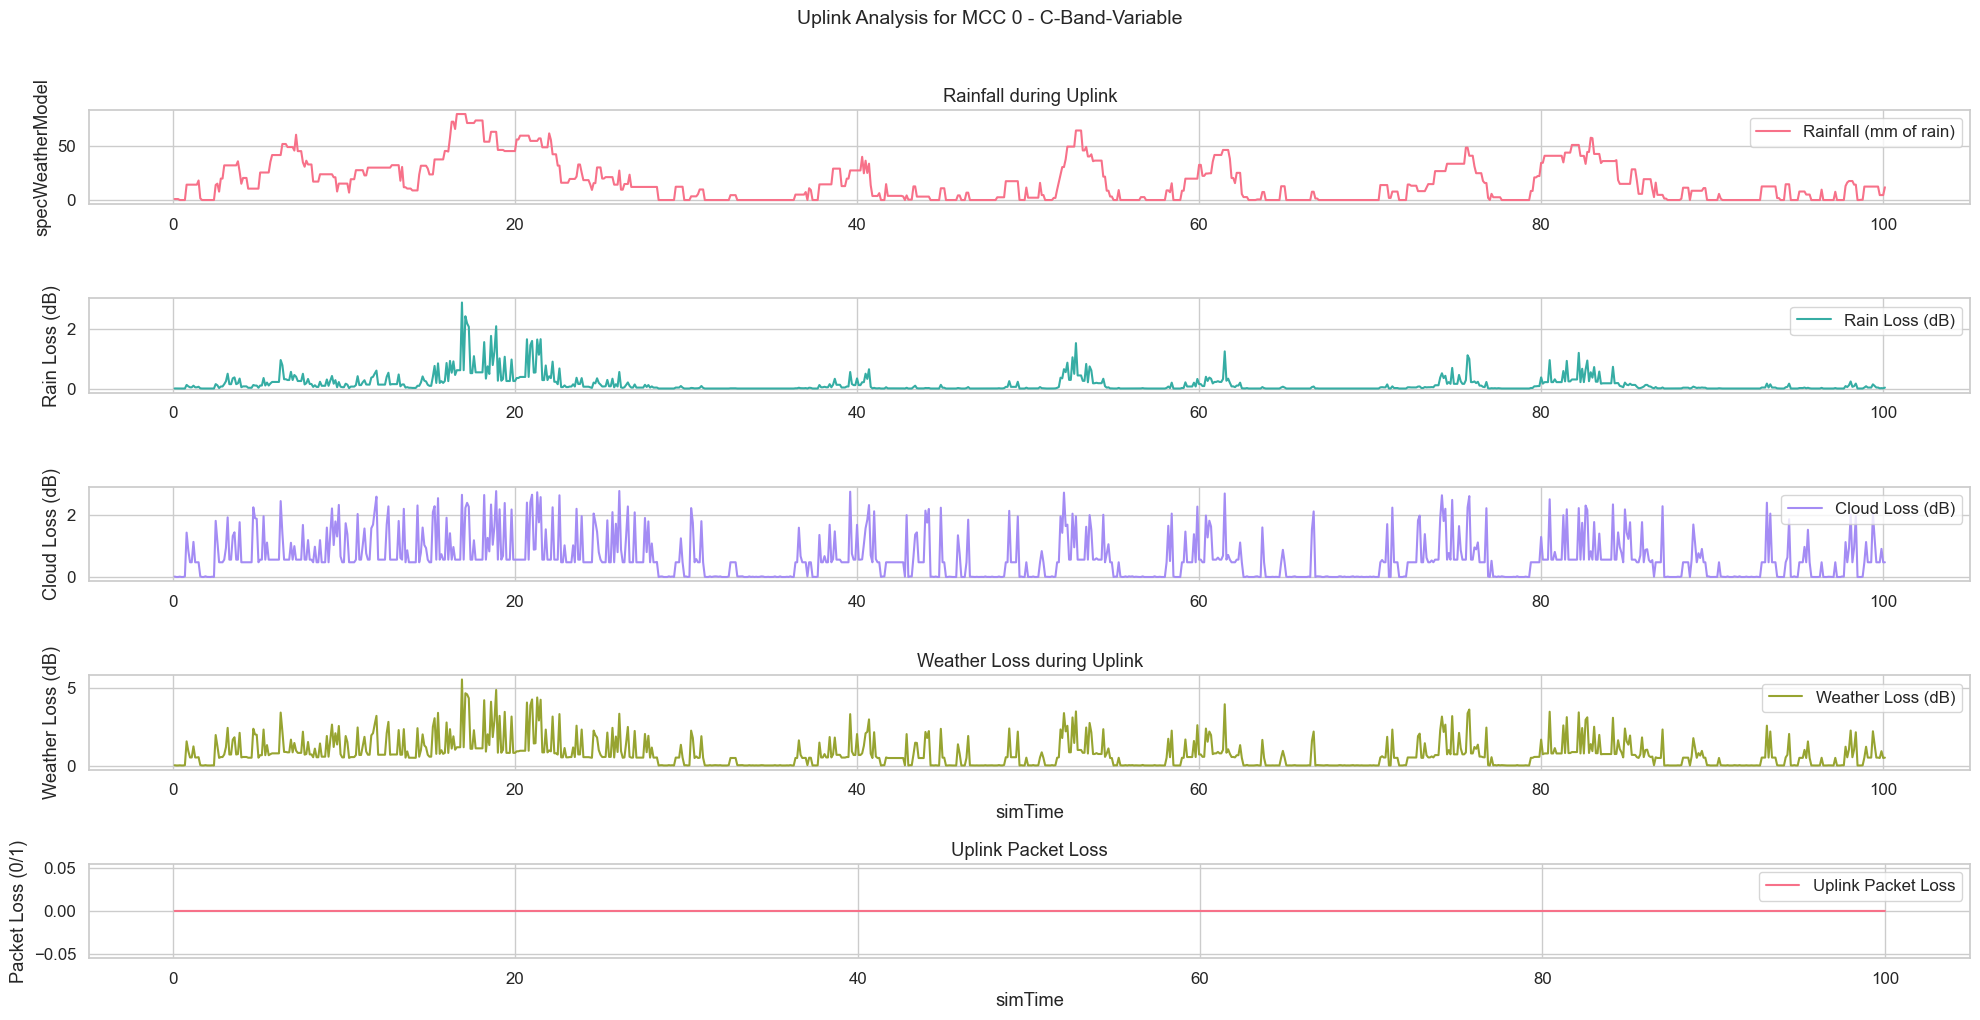

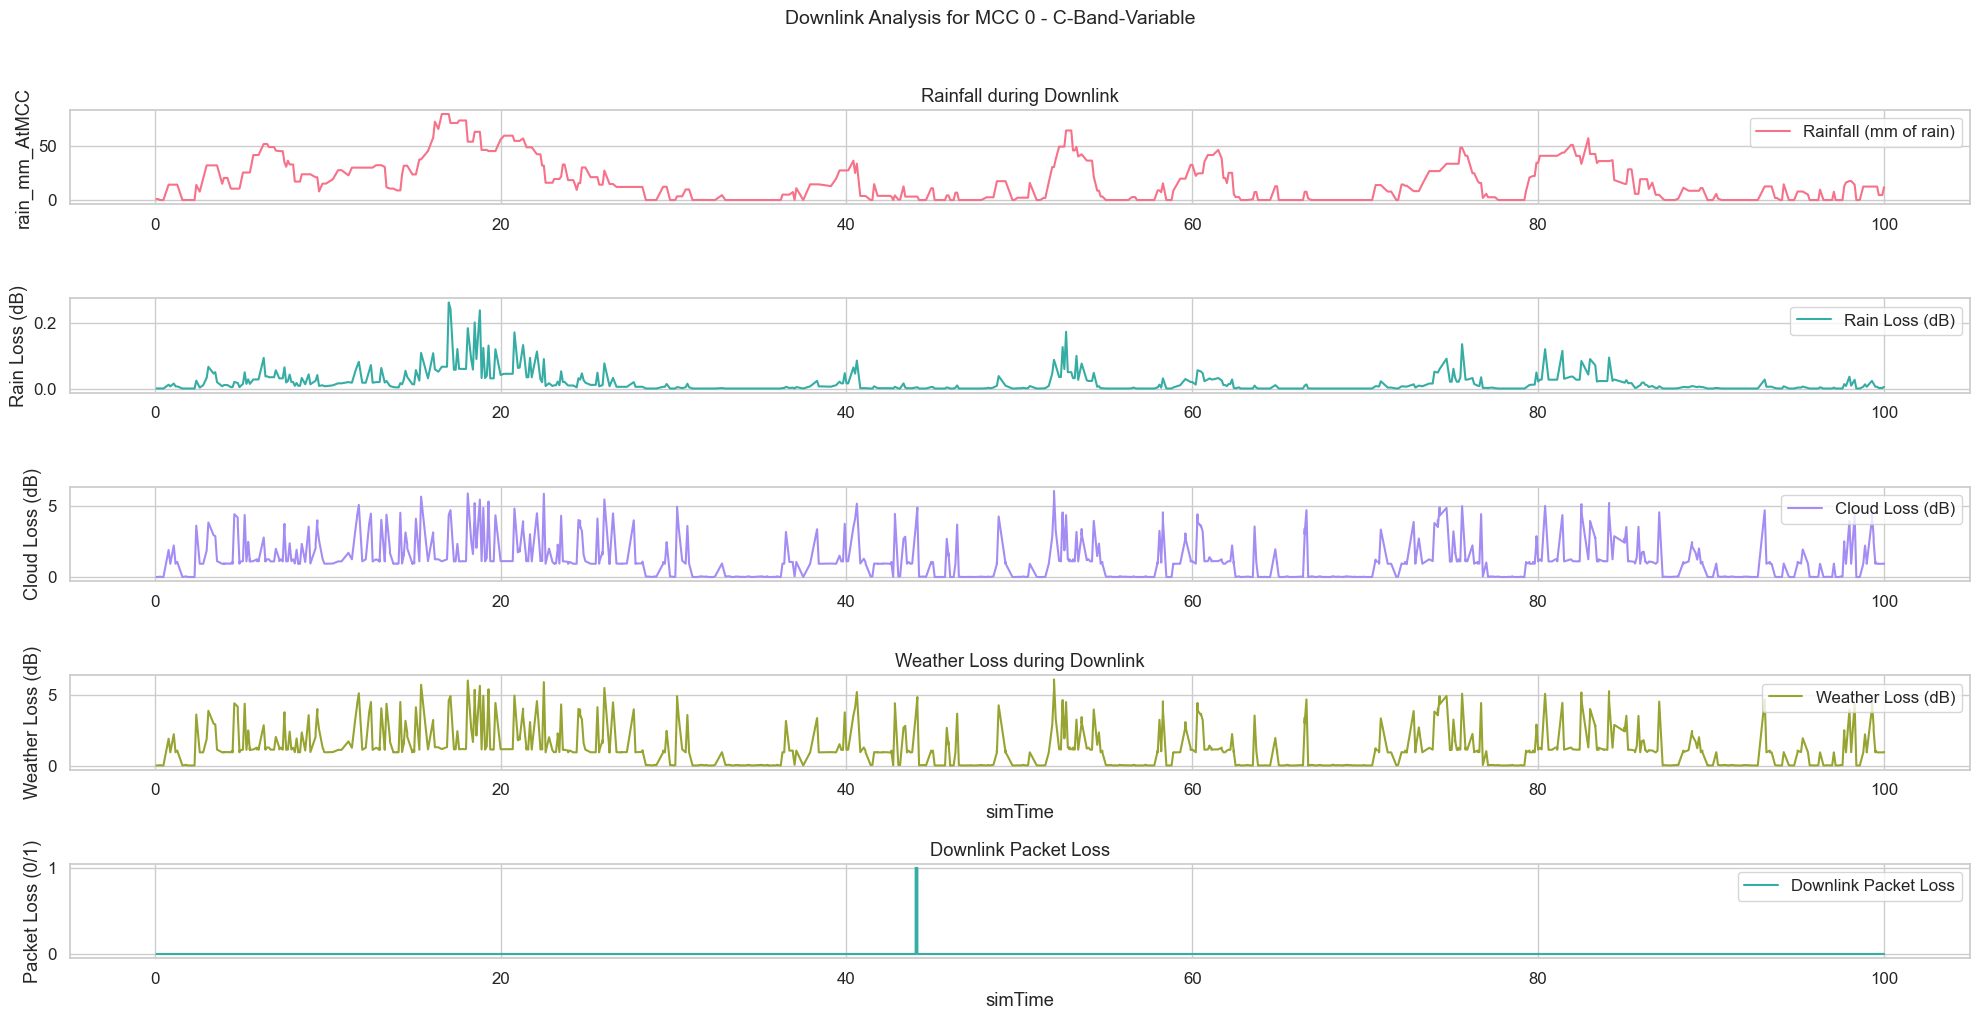

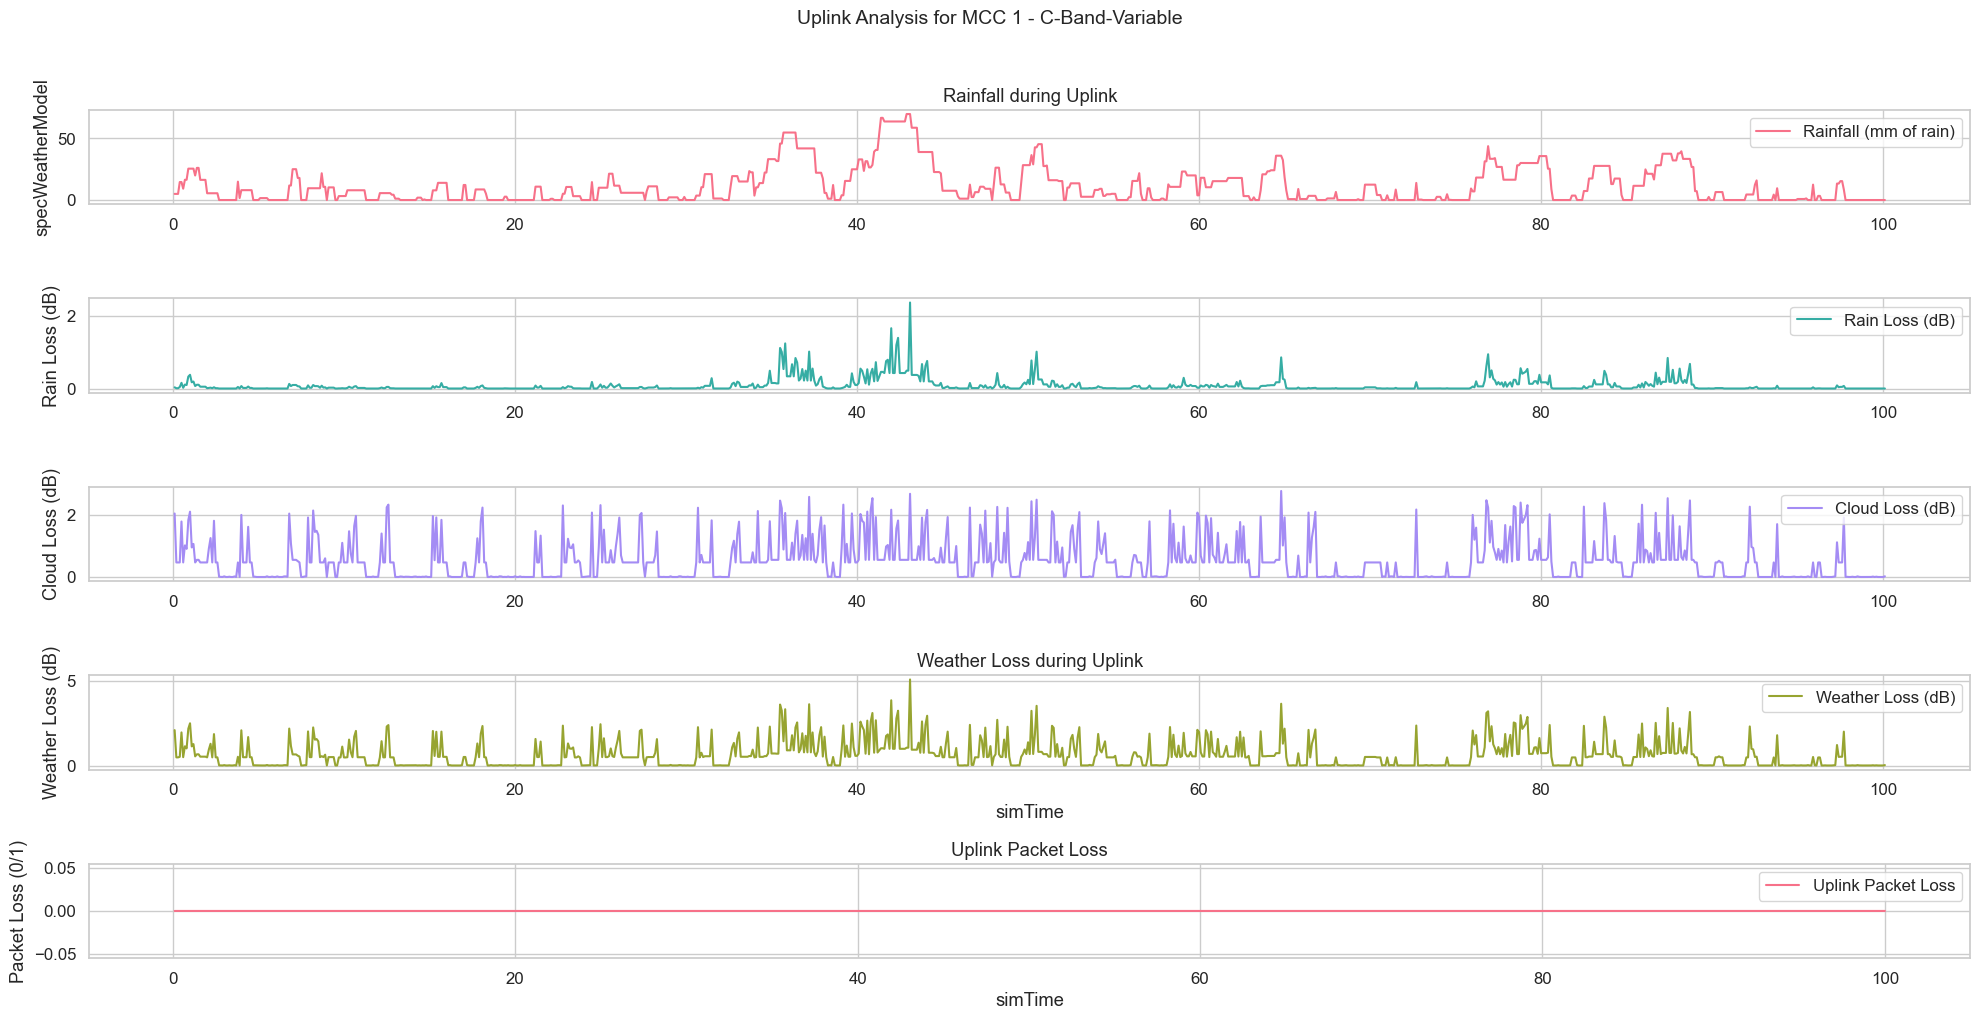

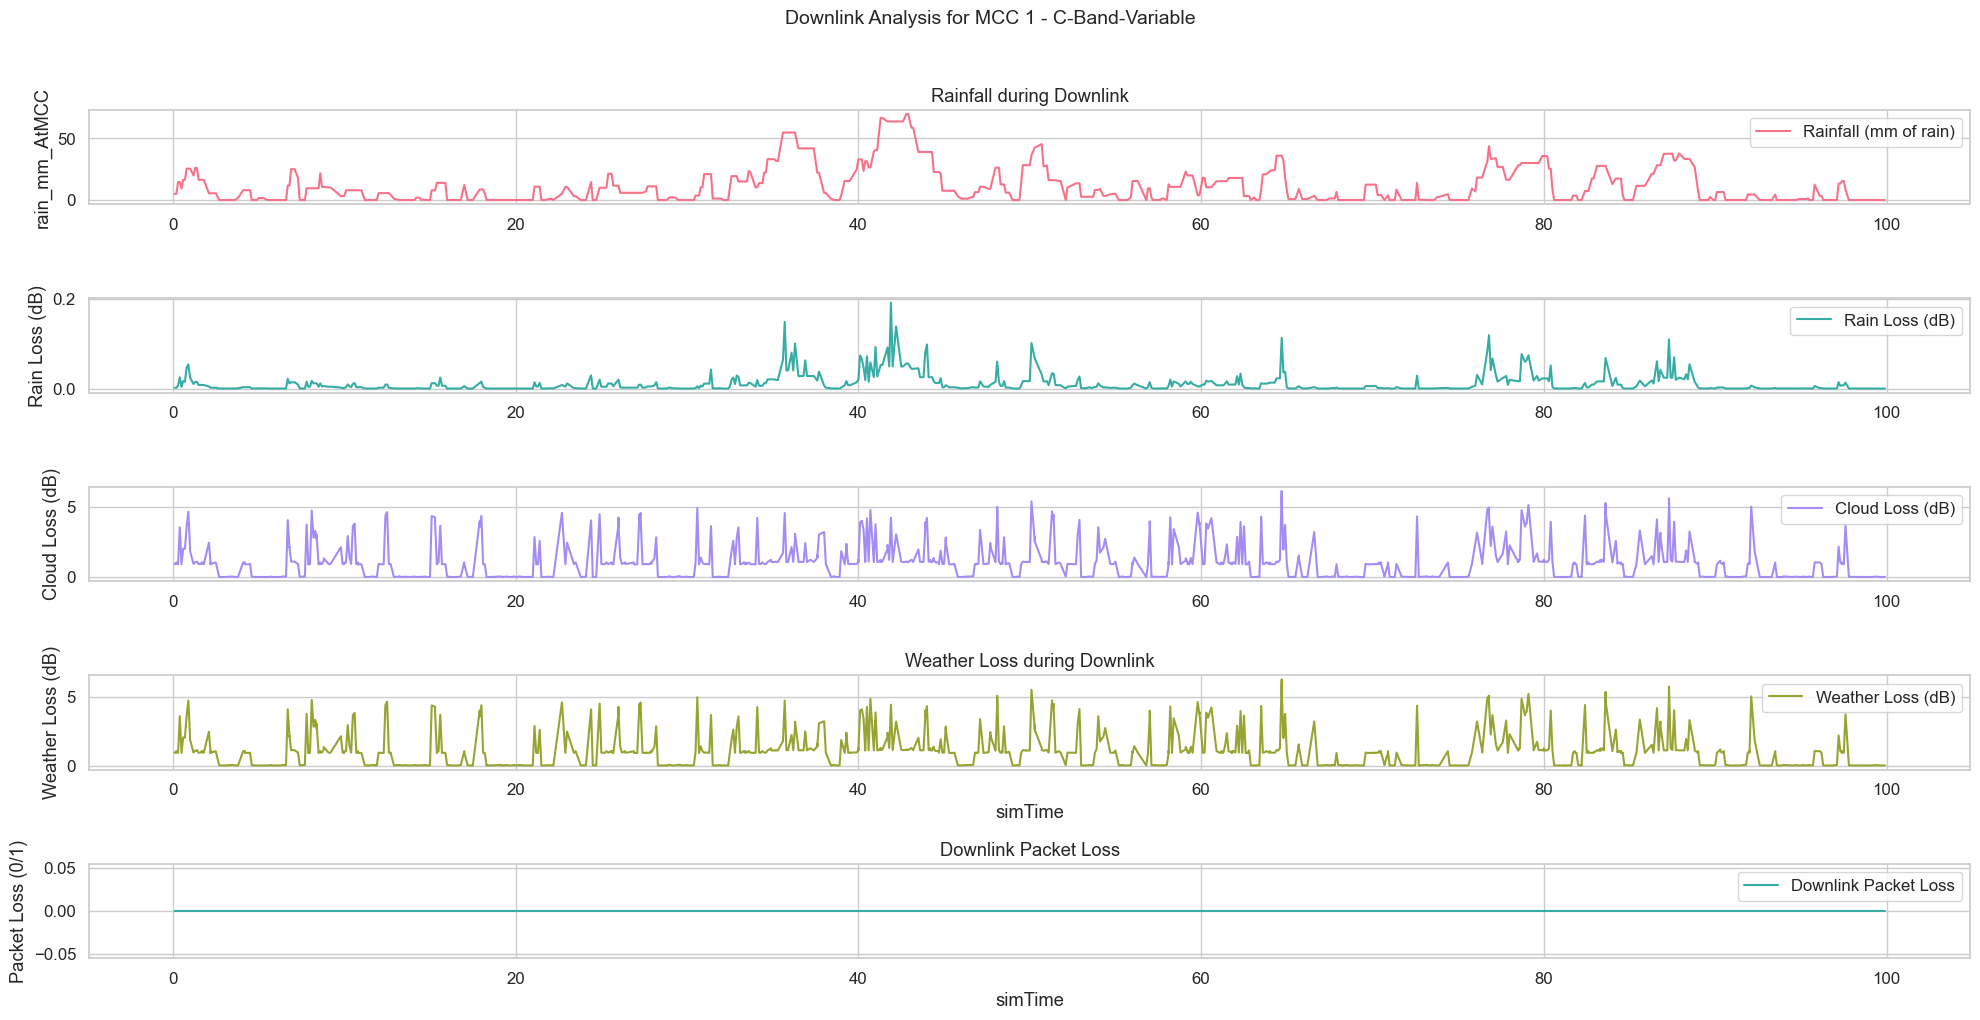

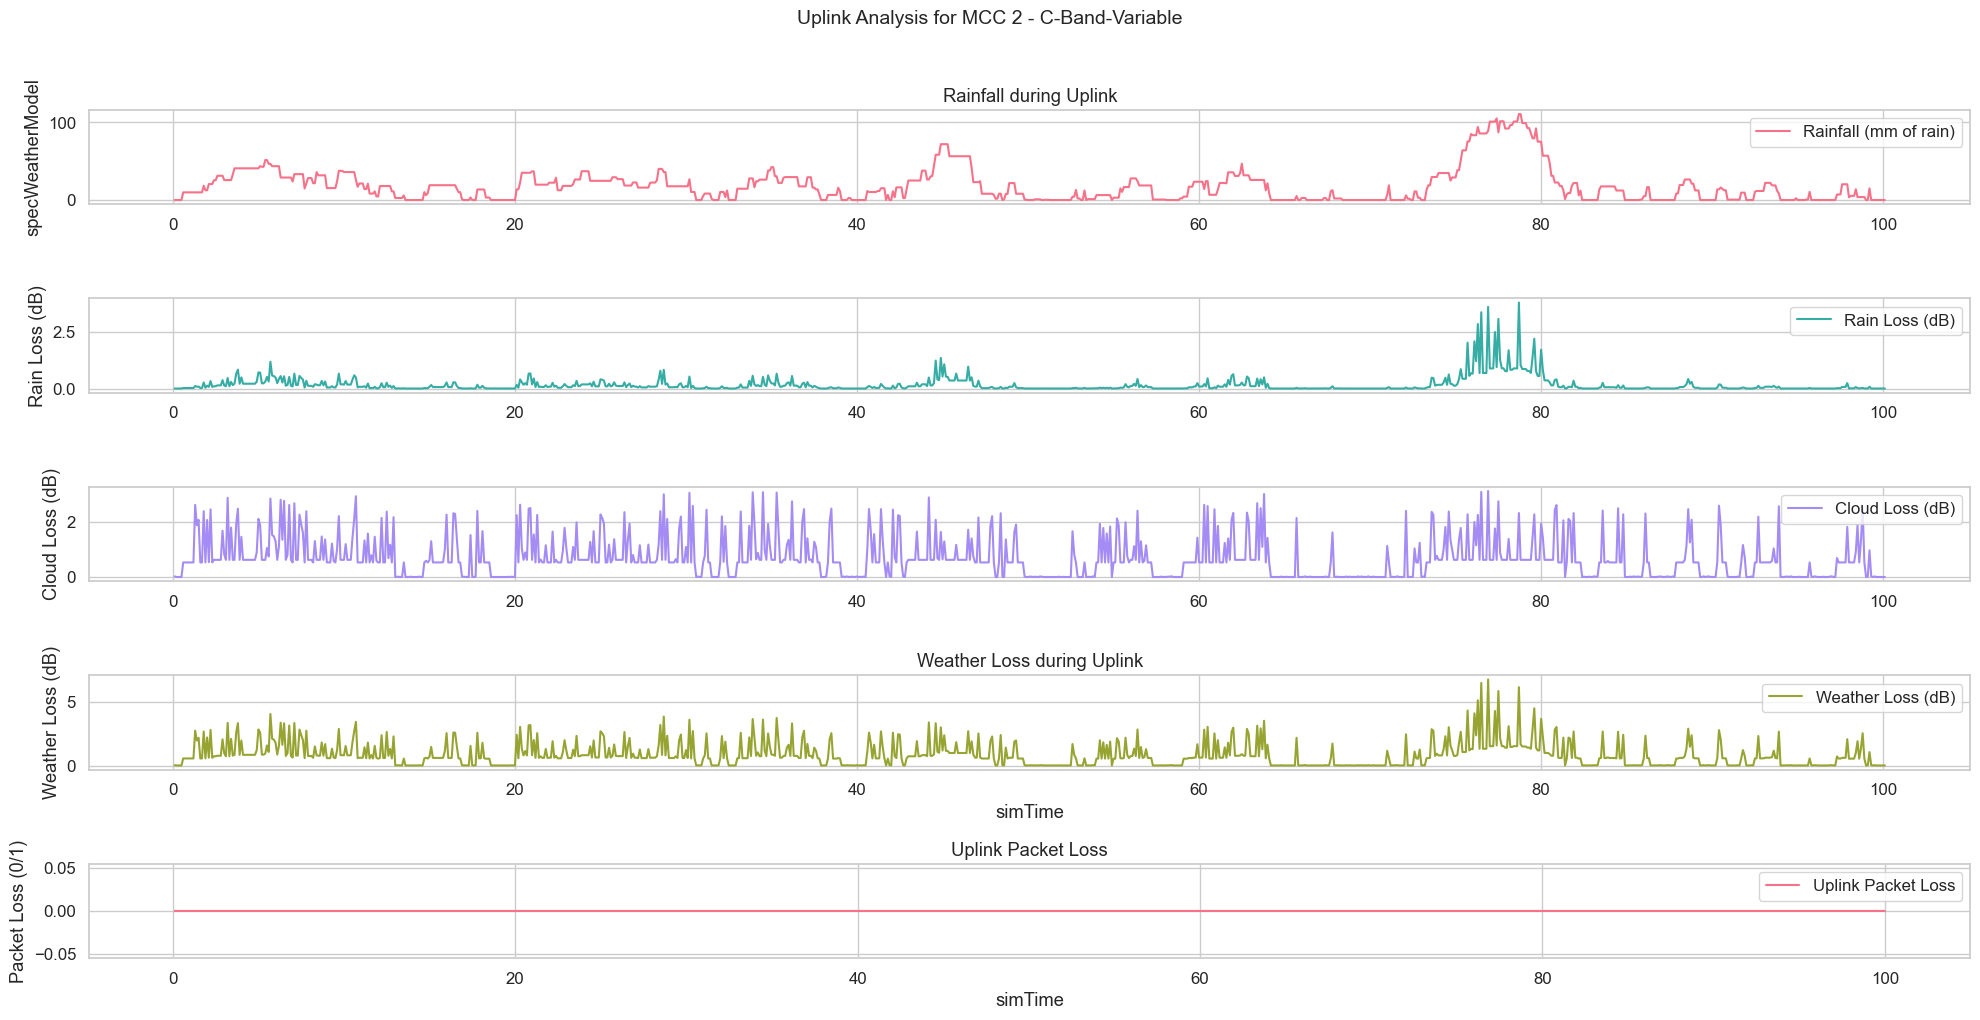

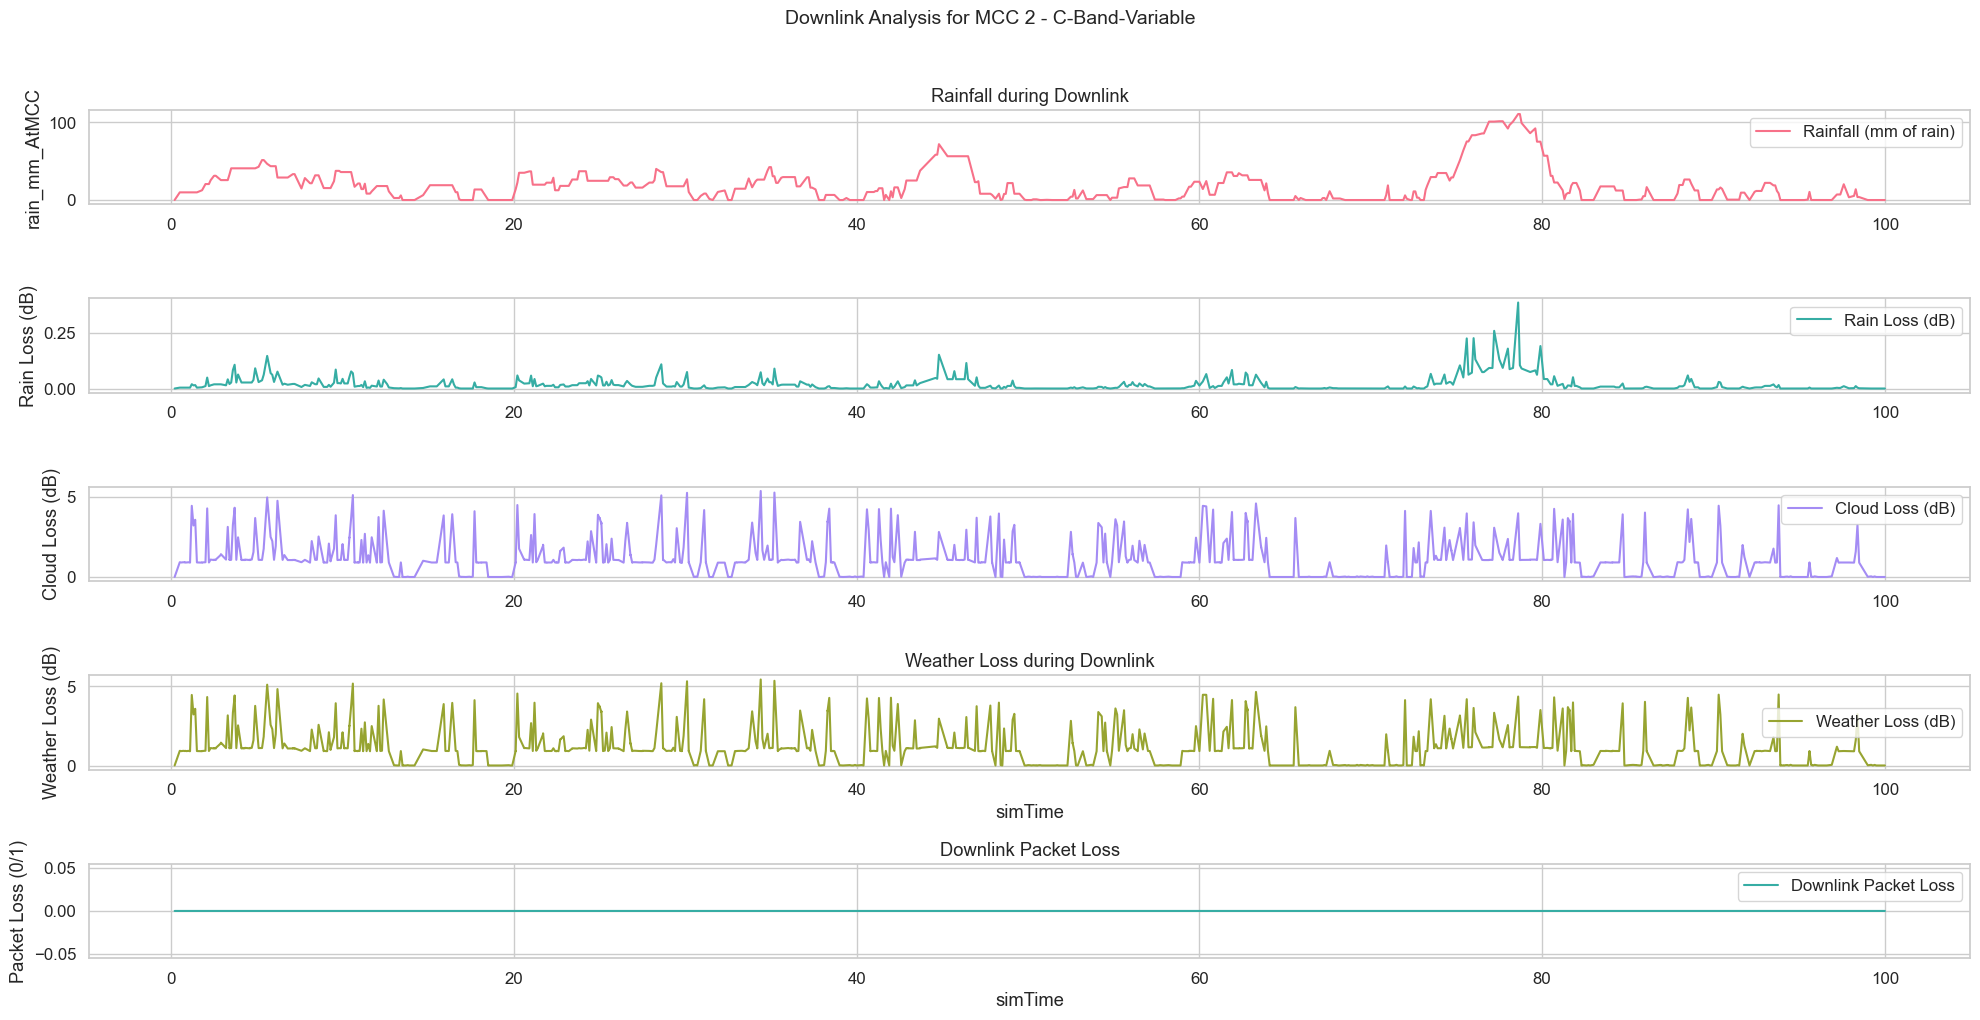

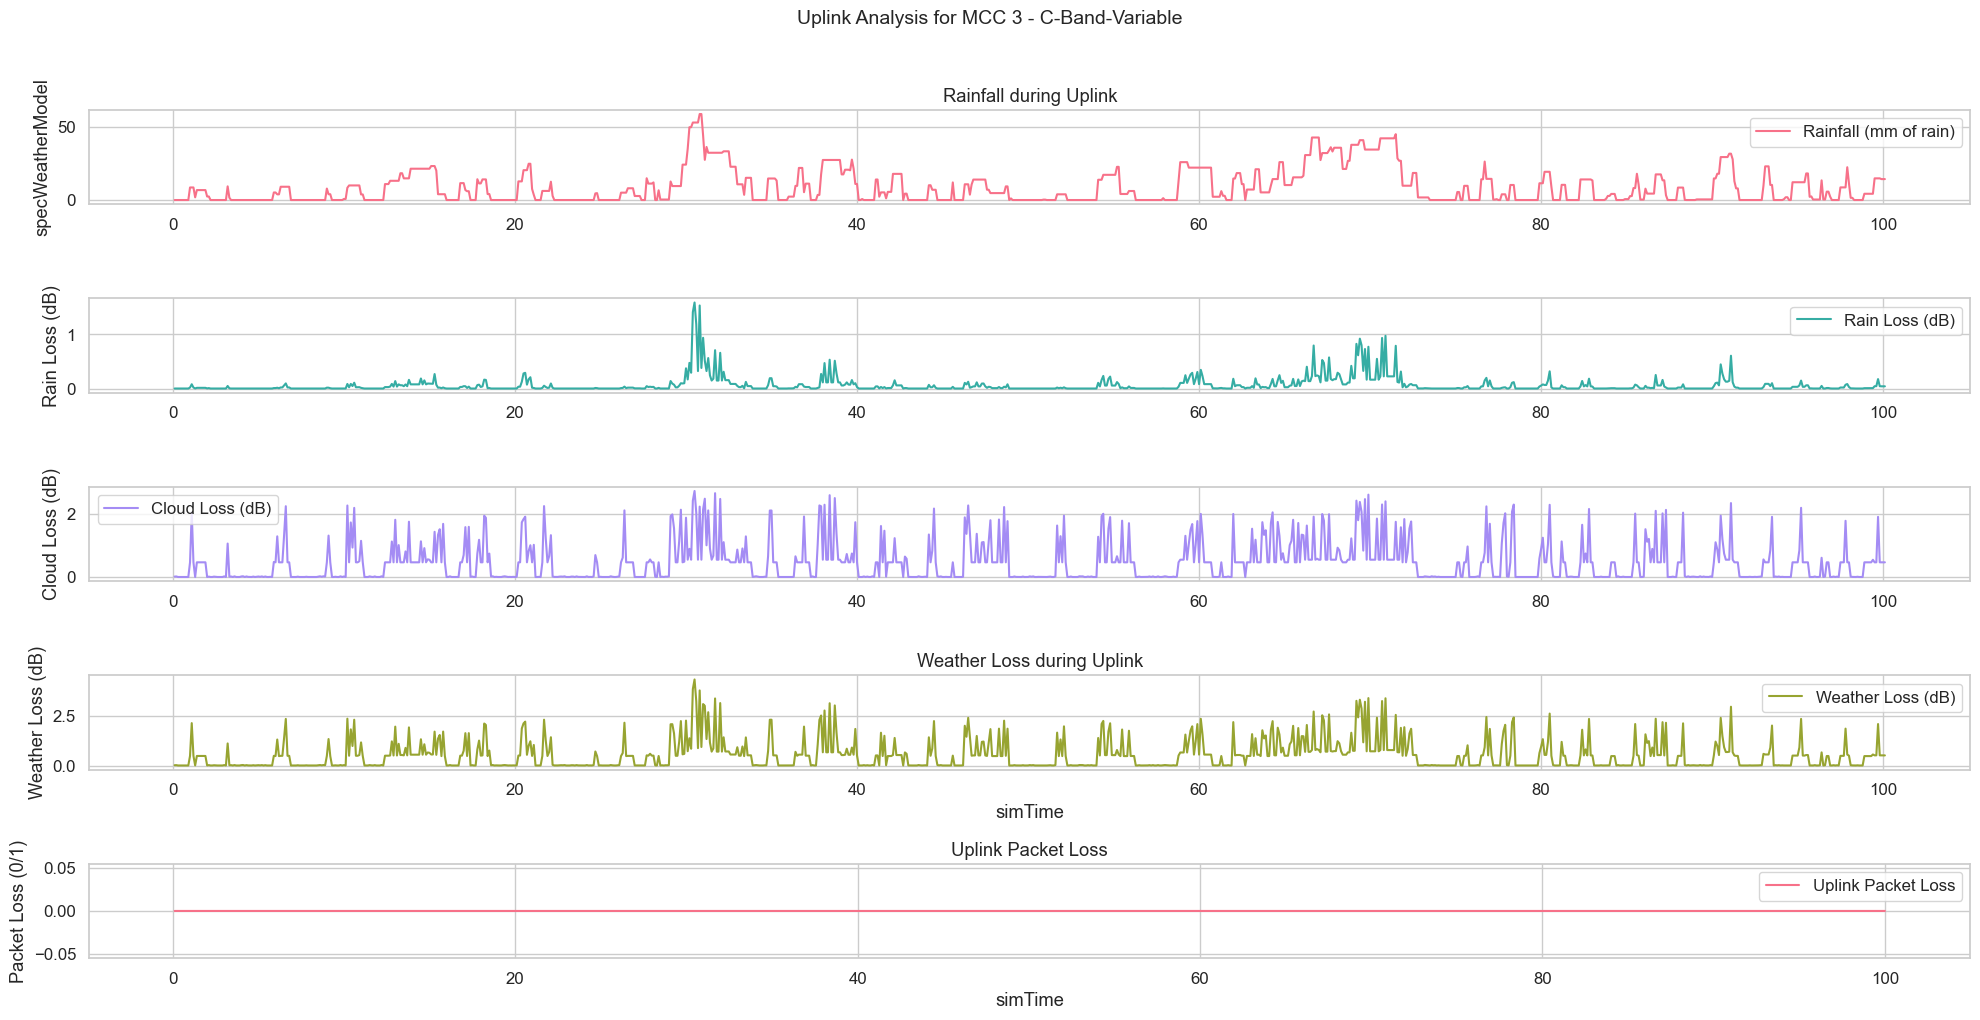

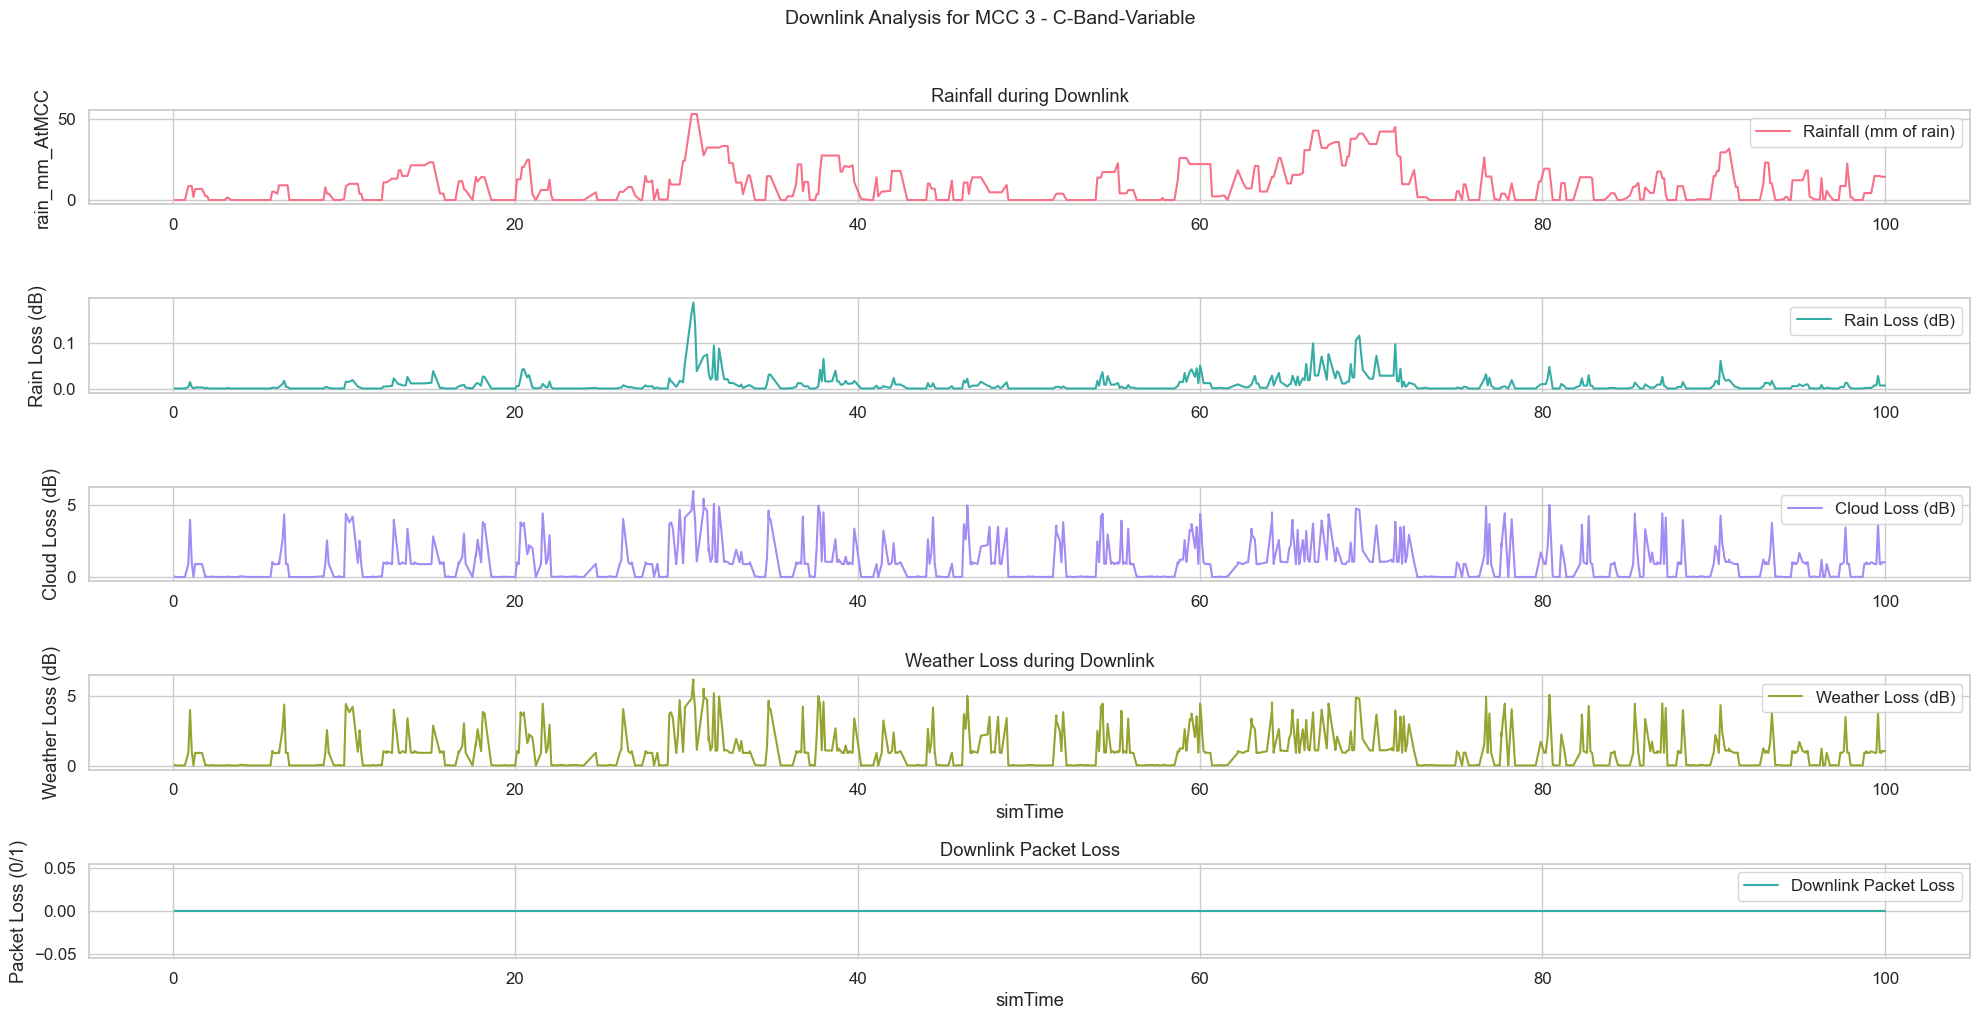

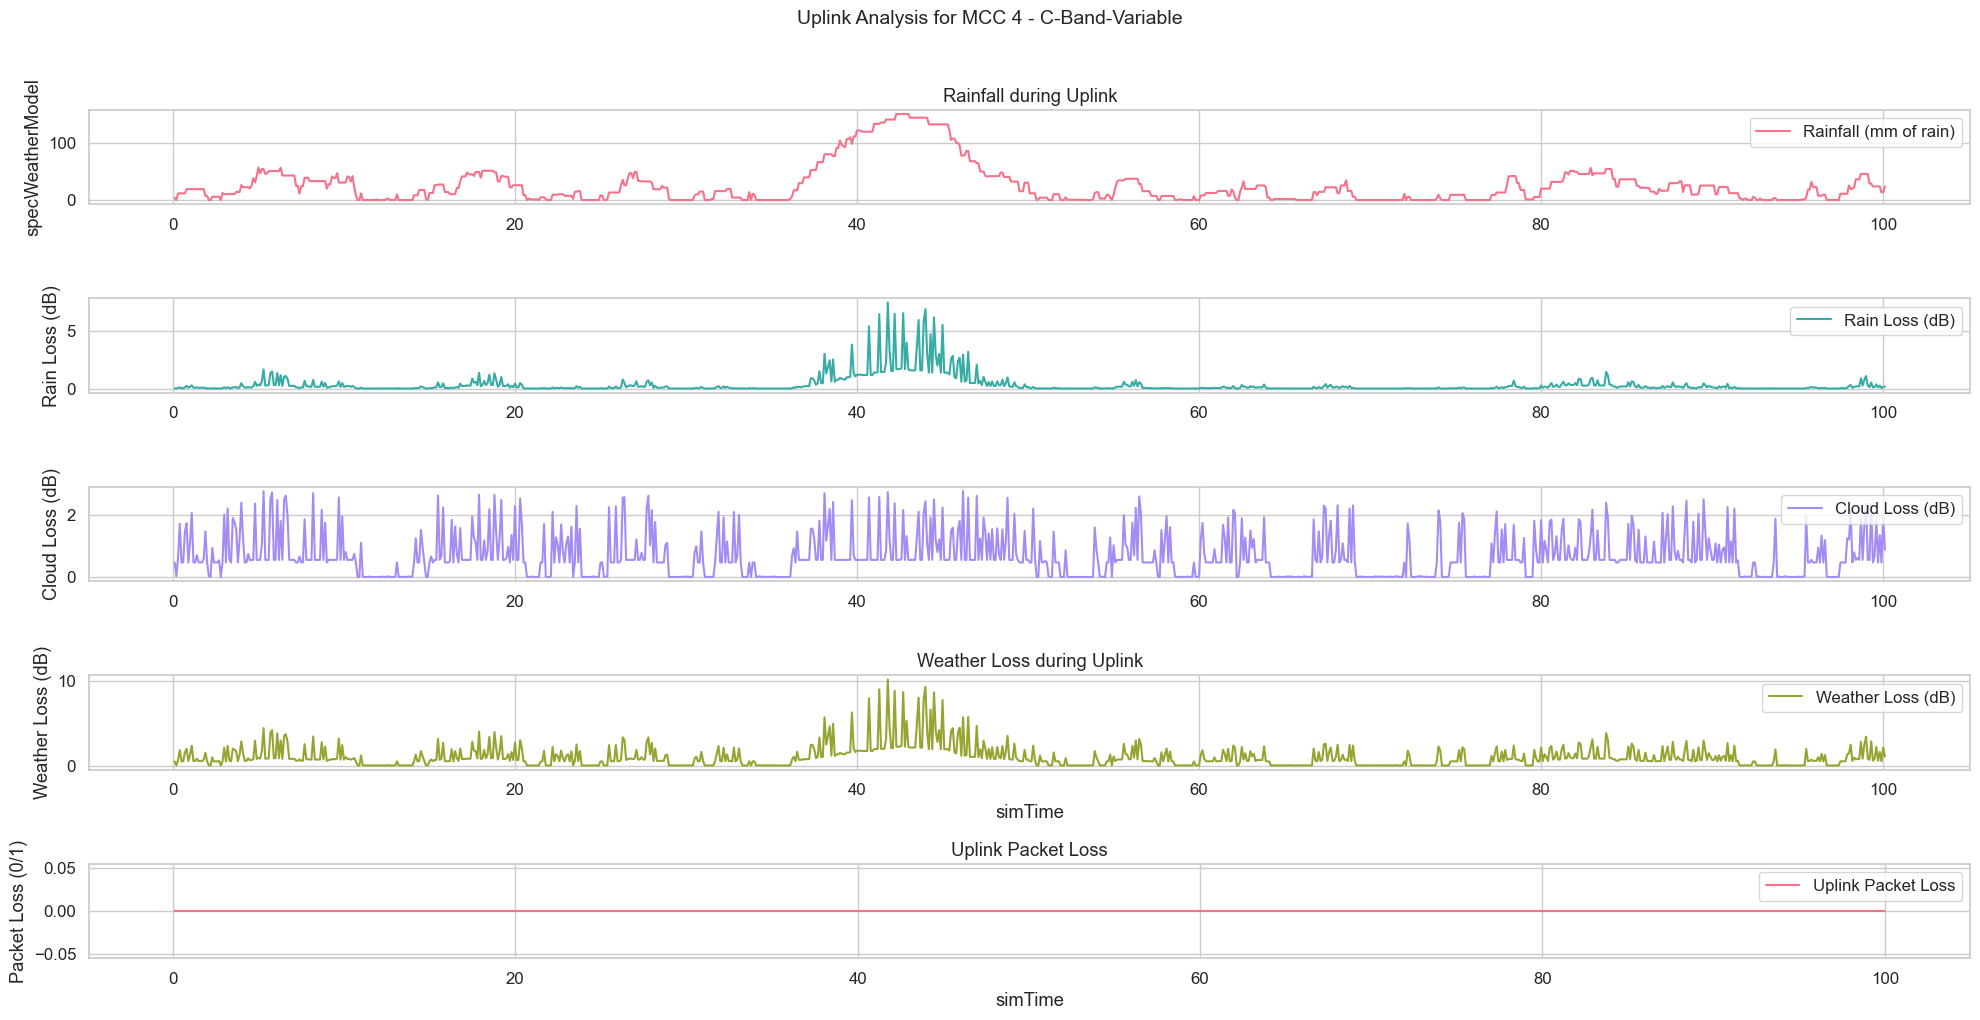

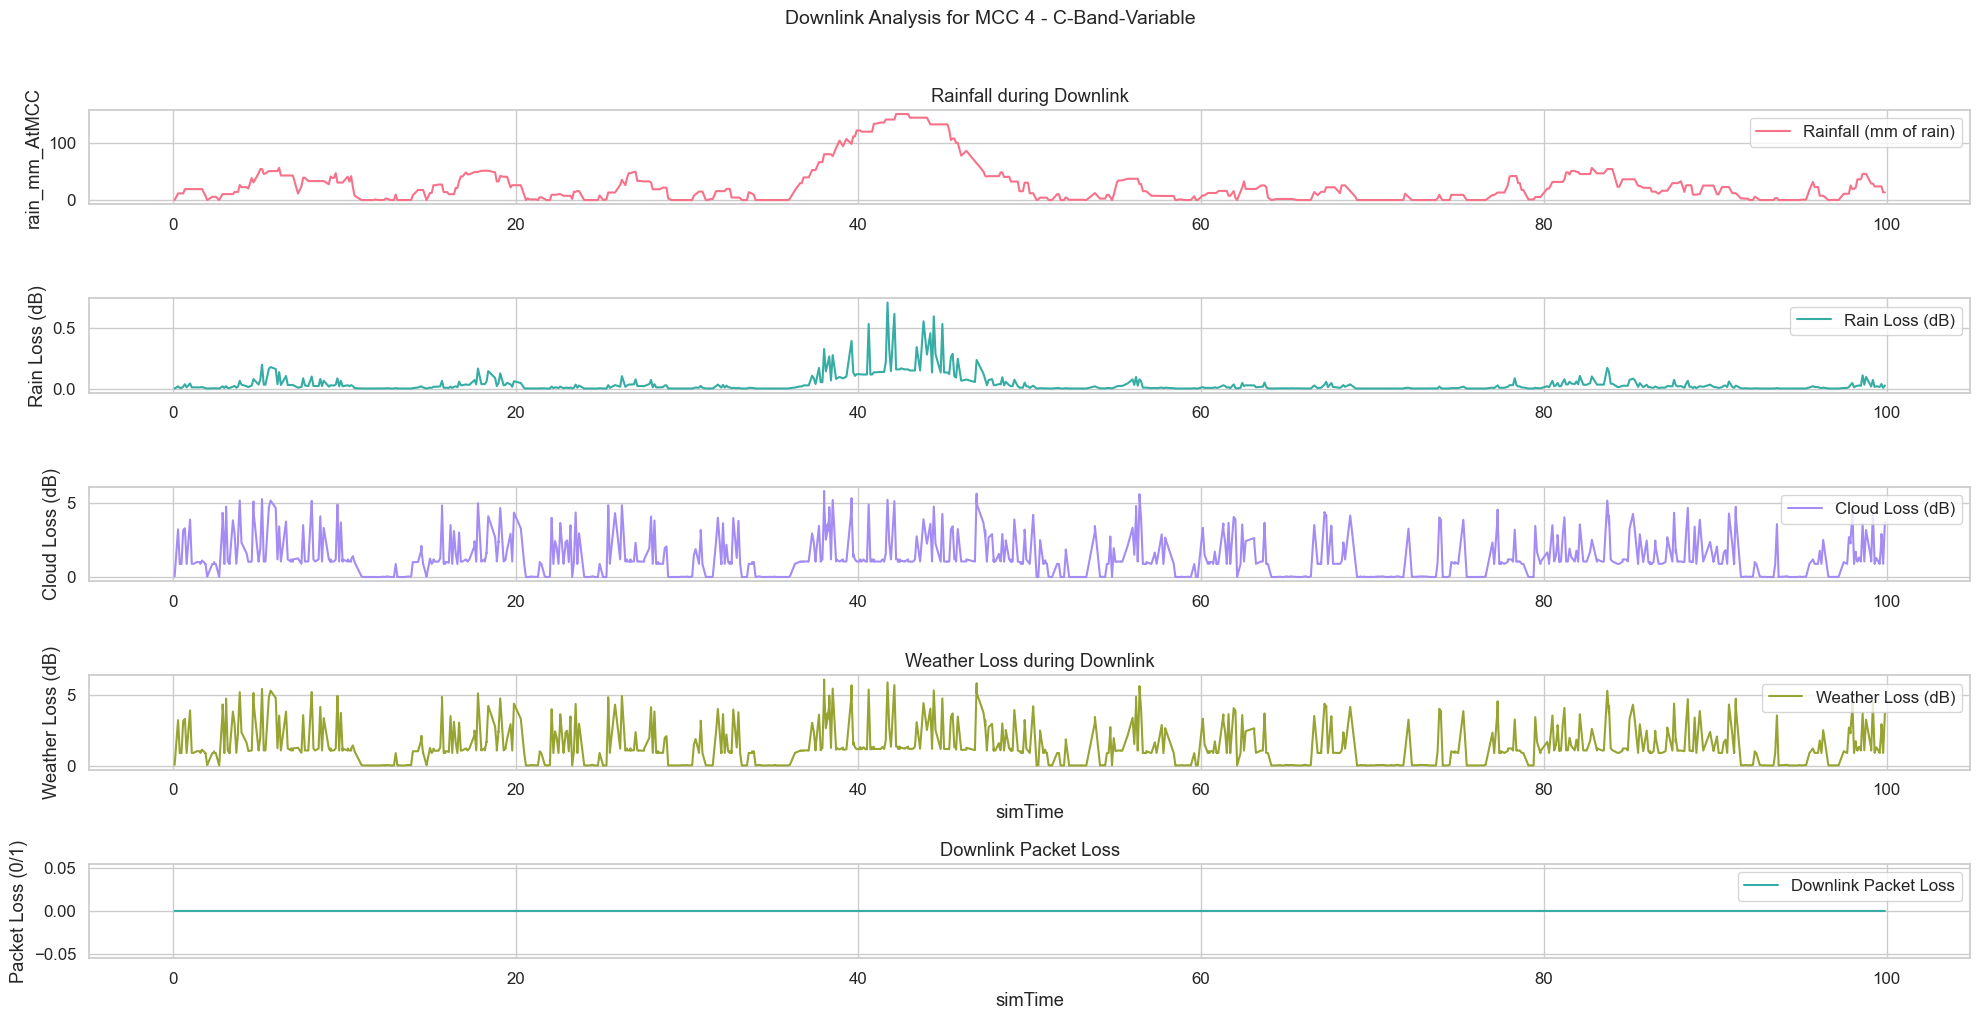

In [6]:
read_and_plot_files("C-Band-Variable")

## Ku-Band

In [7]:
read_files_v2("Ku-Band-Variable")

MCC 0: Packets Sent = 1056
MCC 0: Packets Lost = 783
MCC 1: Packets Sent = 1056
MCC 1: Packets Lost = 858
MCC 2: Packets Sent = 1056
MCC 2: Packets Lost = 851
MCC 3: Packets Sent = 1056
MCC 3: Packets Lost = 859
MCC 4: Packets Sent = 1055
MCC 4: Packets Lost = 864

Satellite: Packets Sent = 4883
Satellite: Packets Lost = 387

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 1.787
Stddev uplink weather loss (dB): 3.266

Average uplink rain loss (dB): 1.659
Stddev uplink rain loss (dB): 3.169

Average uplink cloud loss (dB): 0.128
Stddev uplink cloud loss (dB): 0.146

Average uplink FSPL (dB): 206.537
Stddev uplink FSPL (dB): 0.068

Min uplink FSPL (dB): 206.462
Max uplink FSPL (dB): 206.654

DOWNLINK

Average downlink weather loss (dB): 1.335
Stddev downlink weather loss (dB): 2.289

Average downlink rain loss (dB): 1.185
Stddev downlink rain loss (dB): 2.177

Average downlink cloud loss (dB): 0.151
Stddev downlink cloud loss (dB): 0.169

Average downlink FSPL (dB): 205.204
Stdde

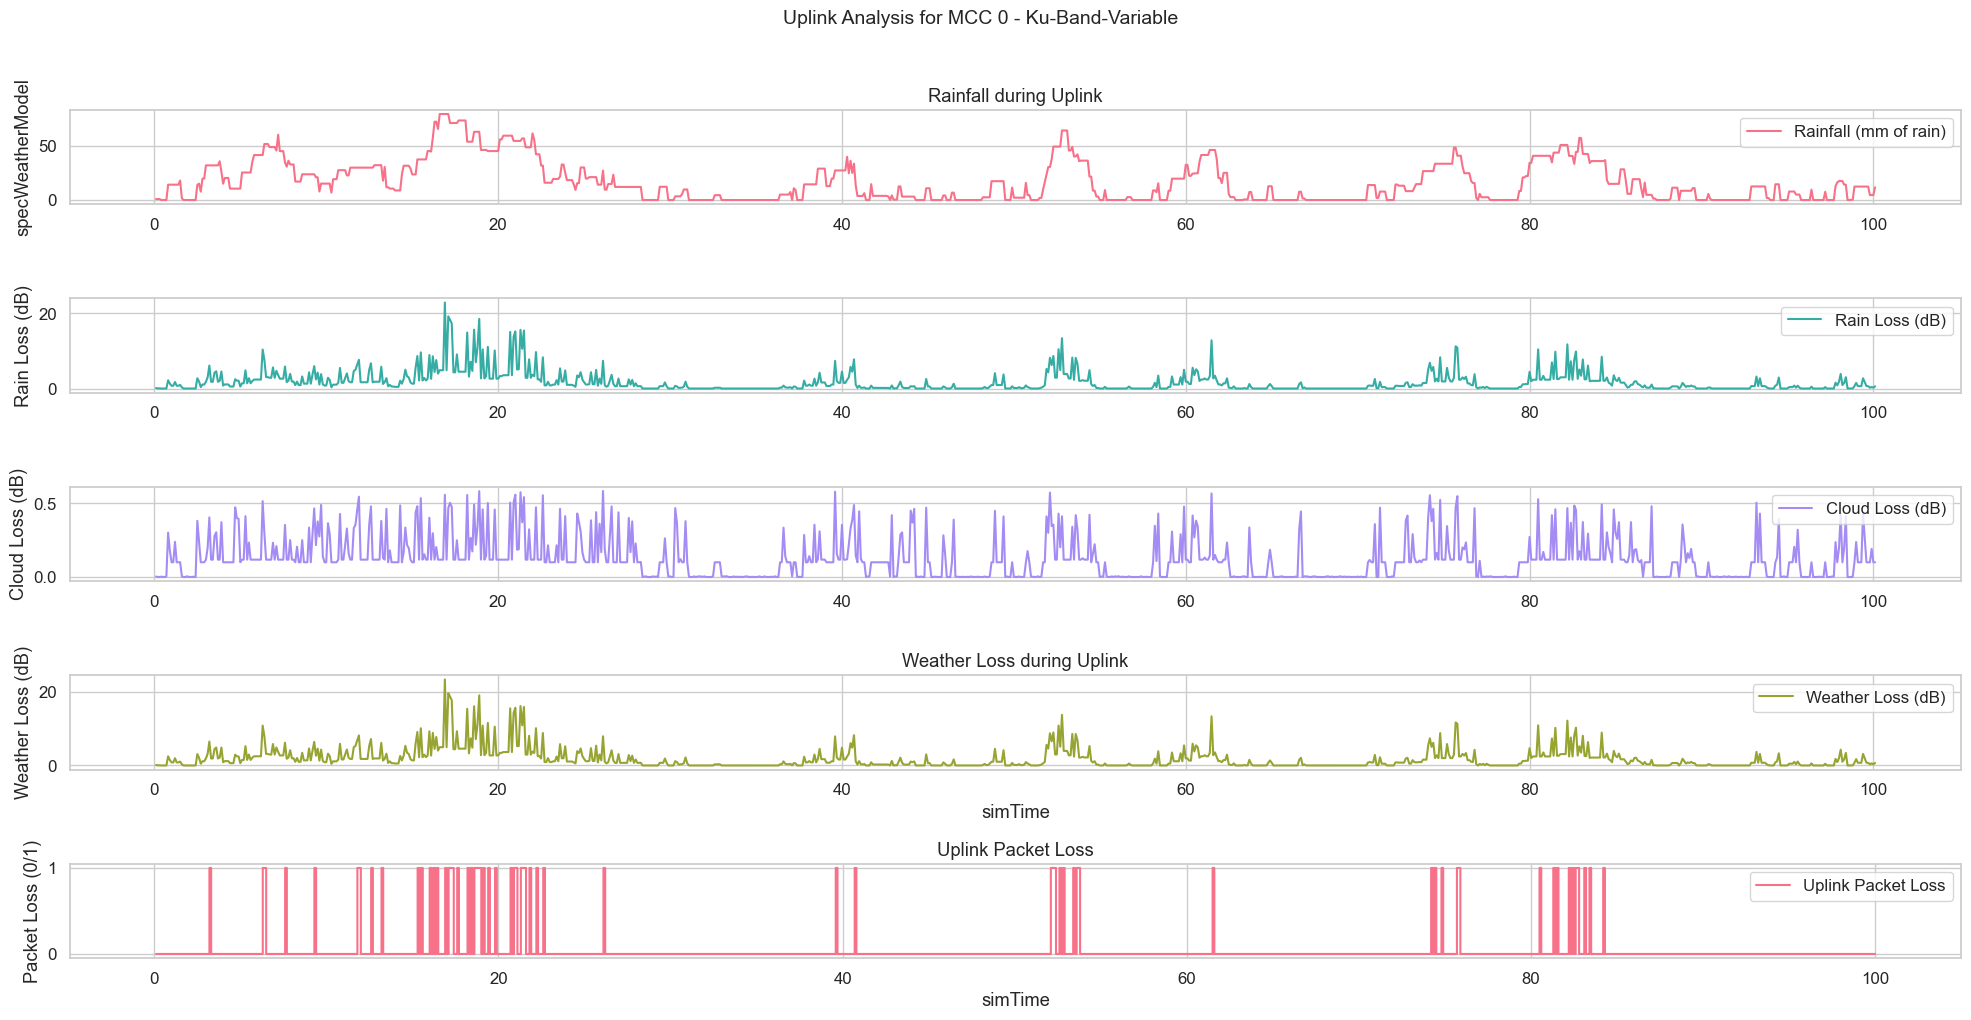

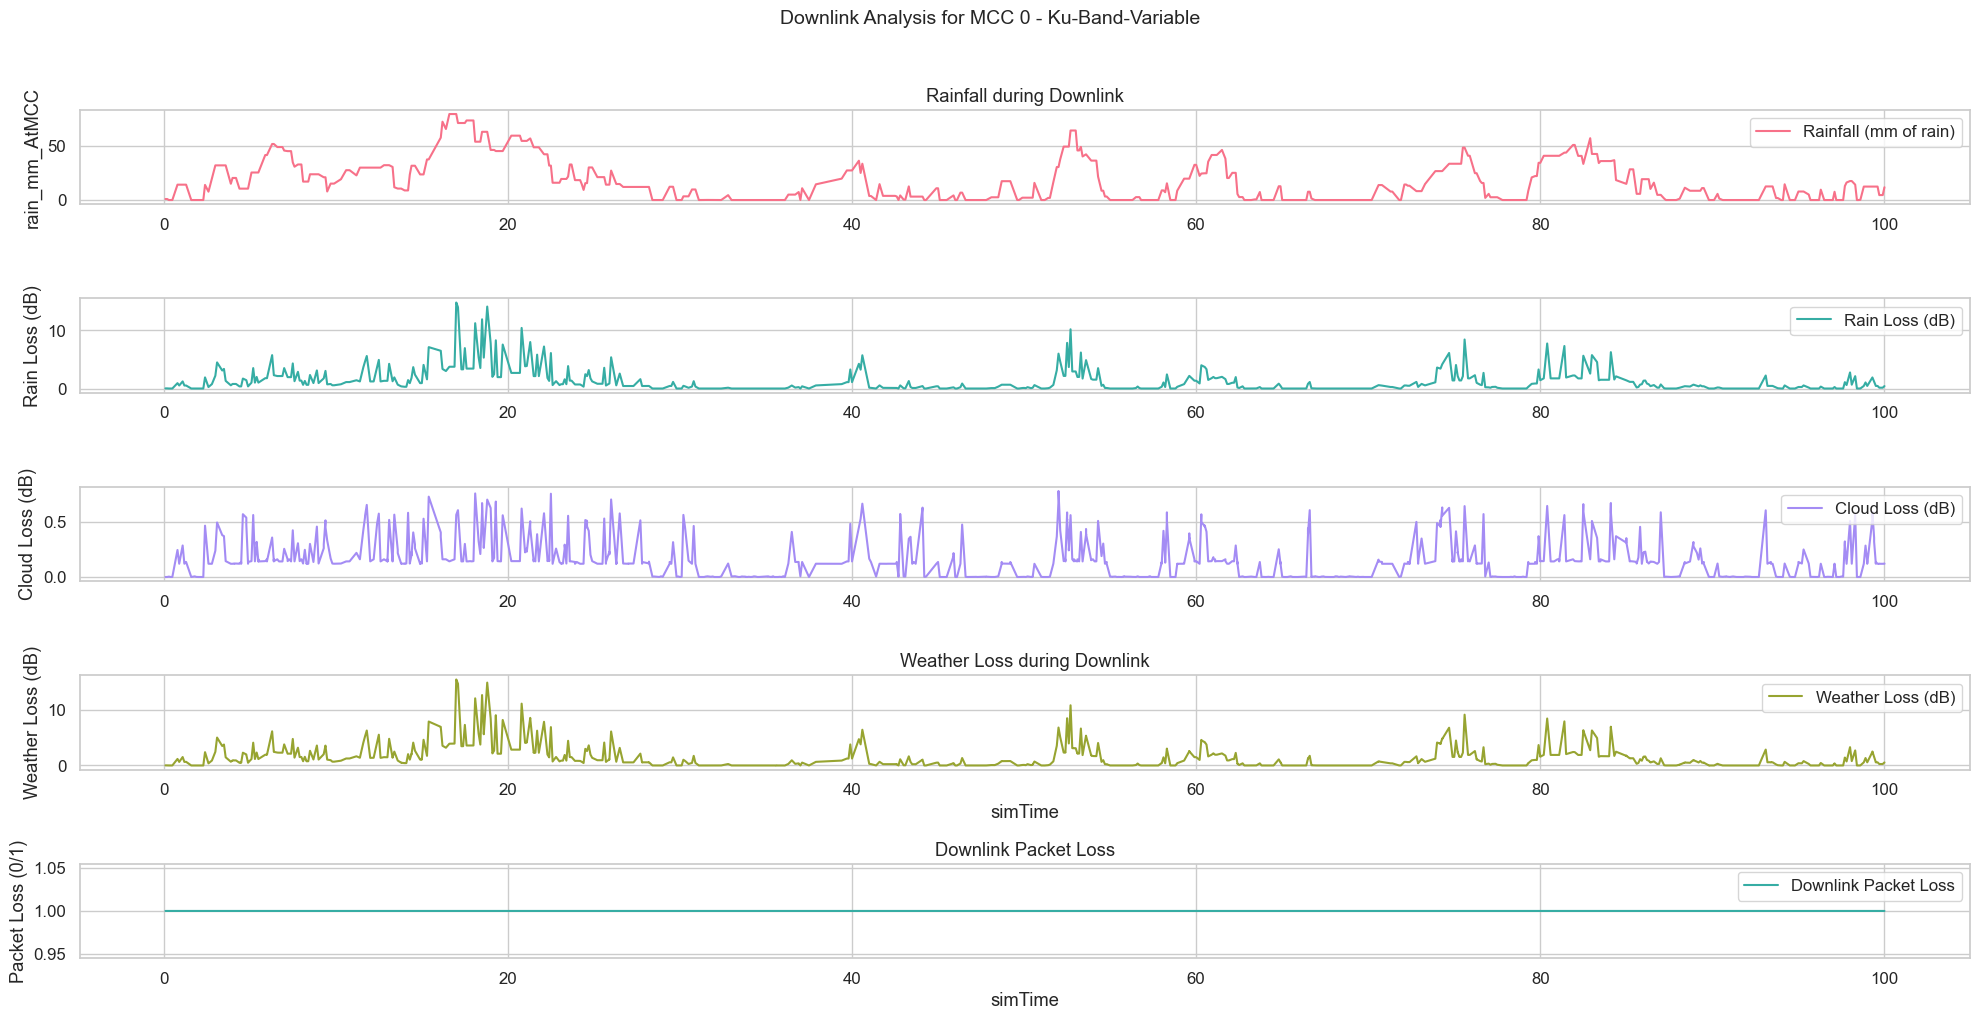

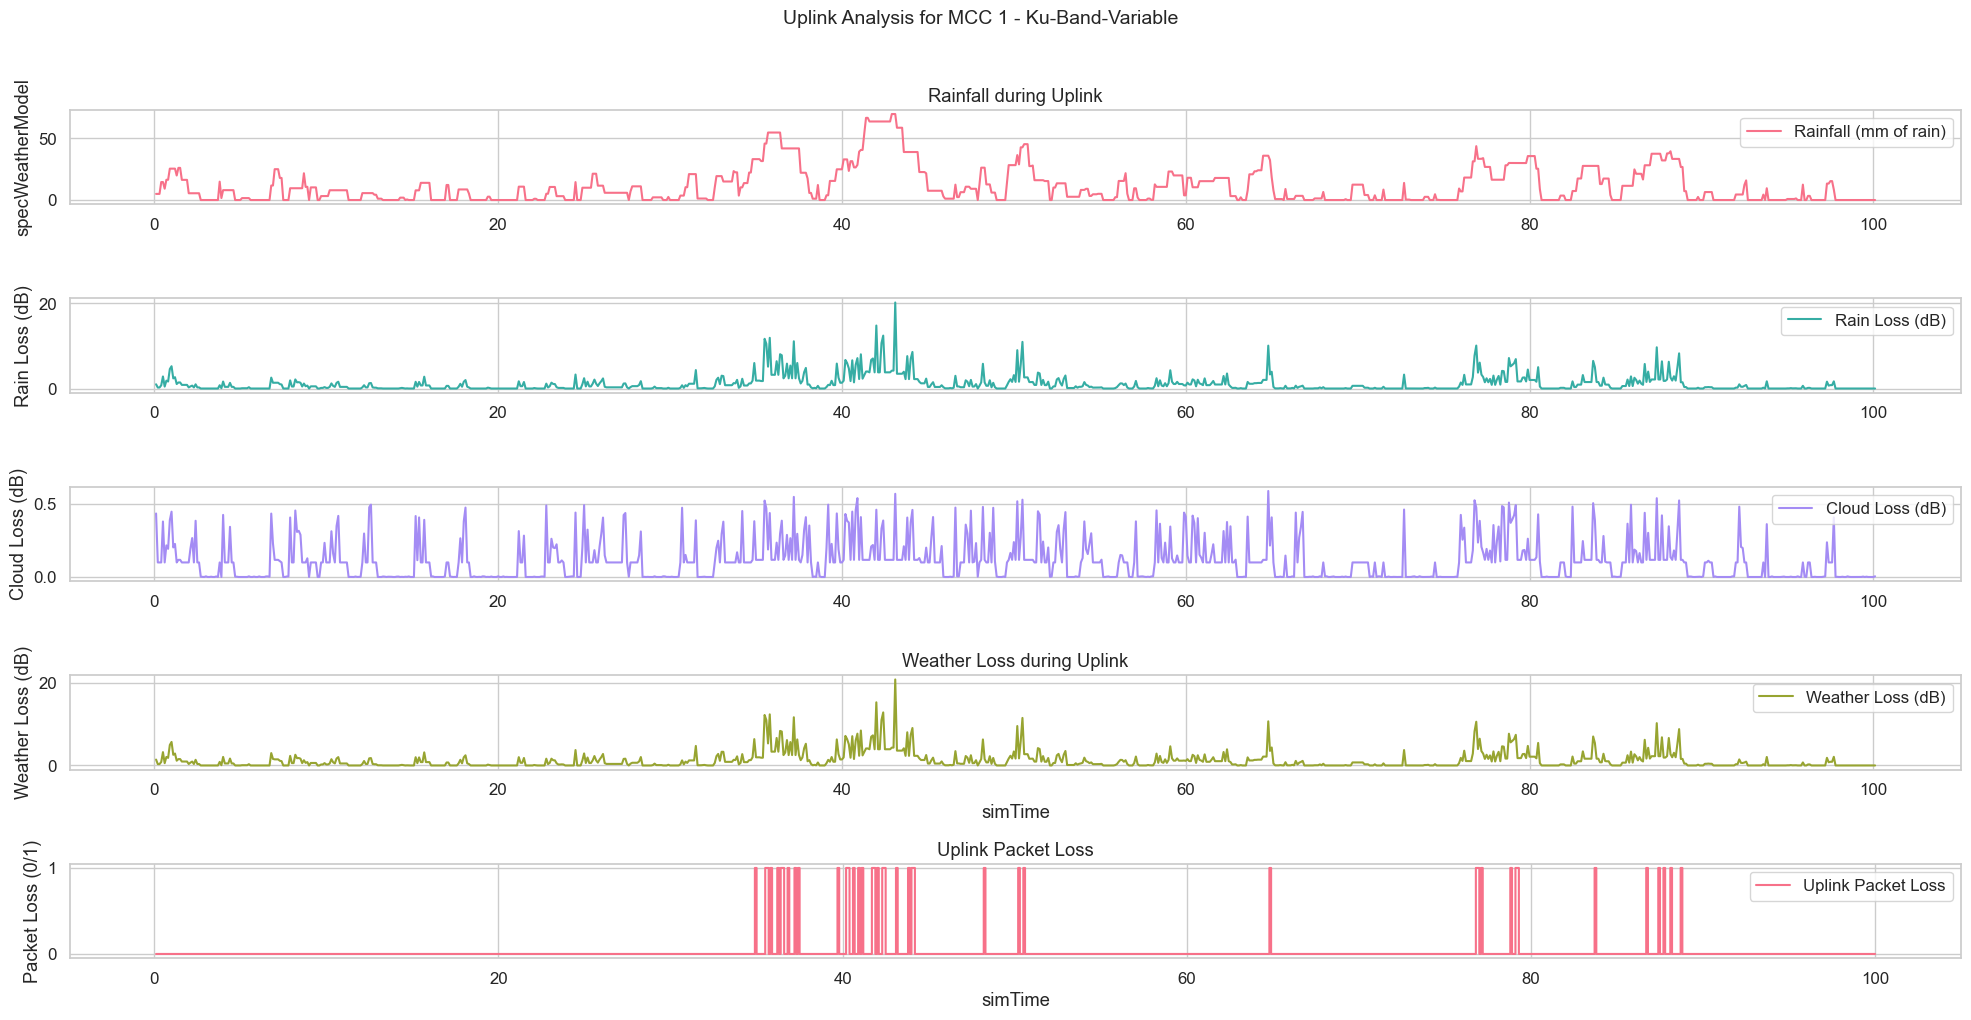

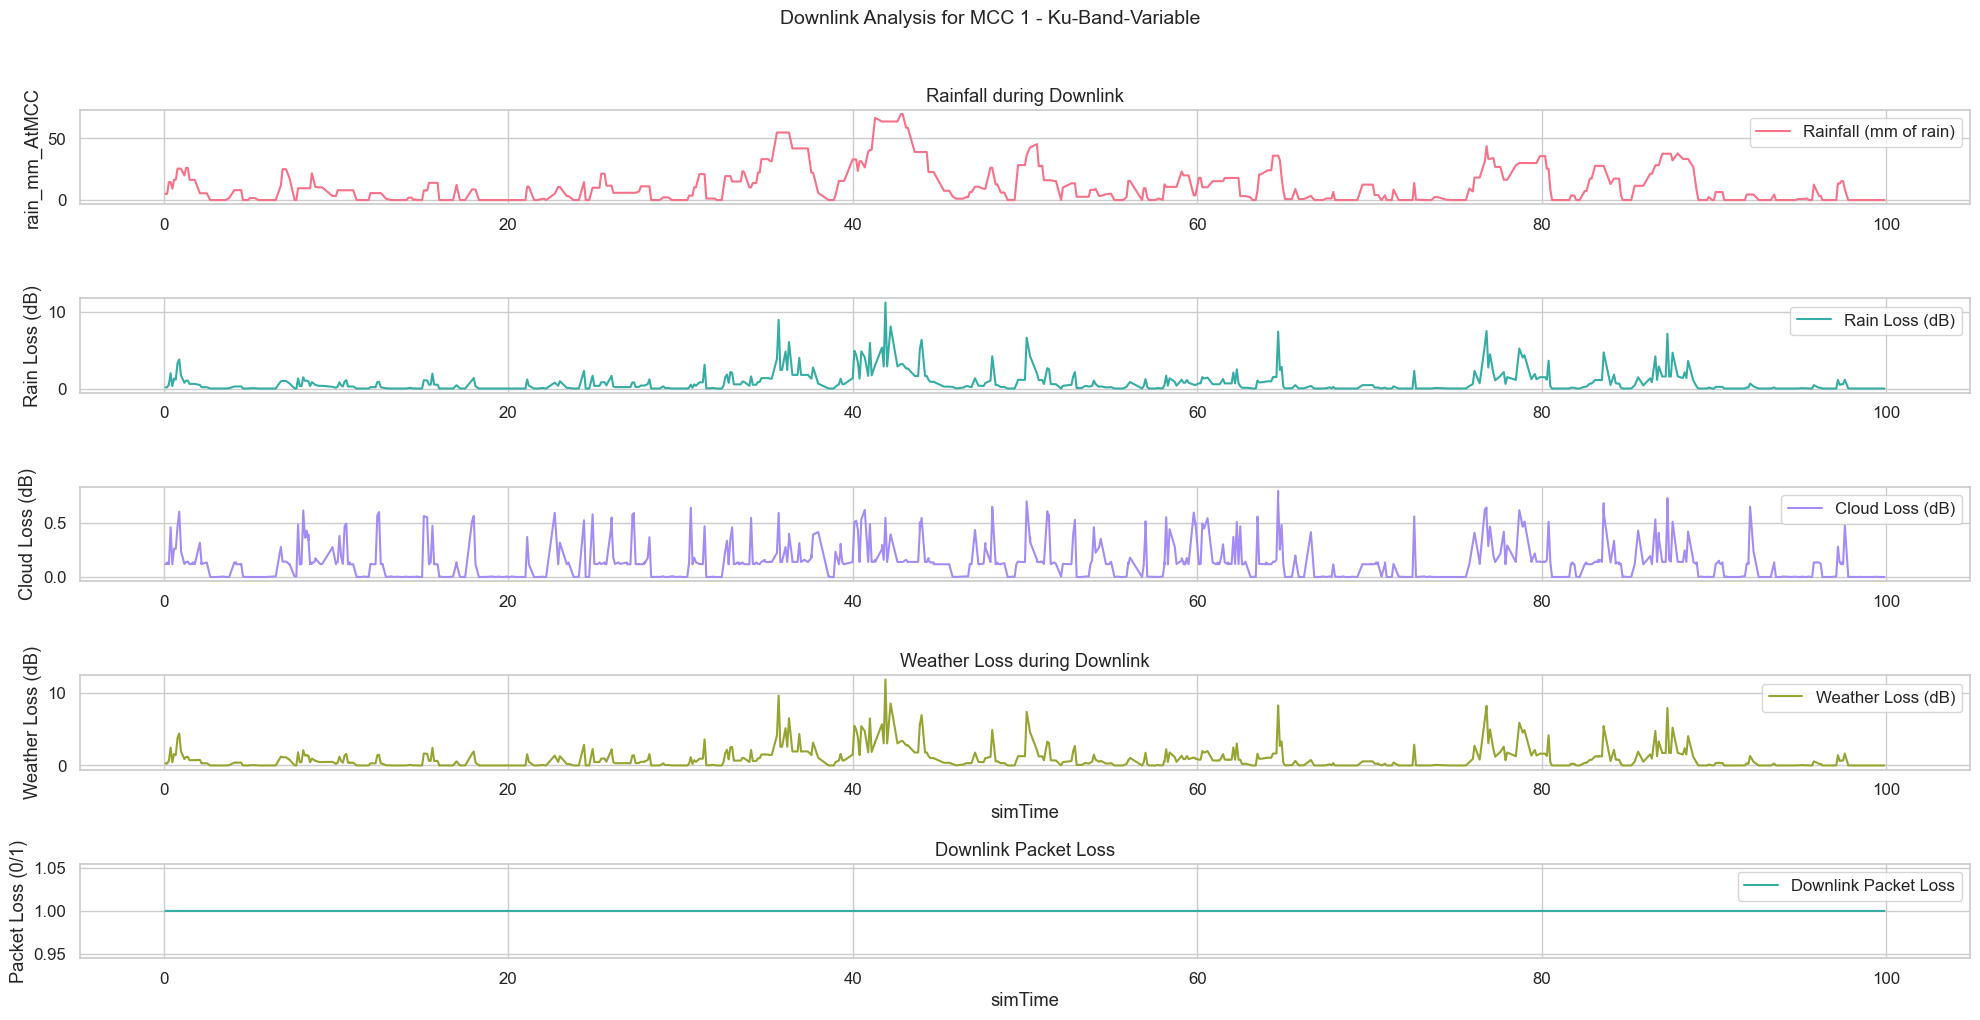

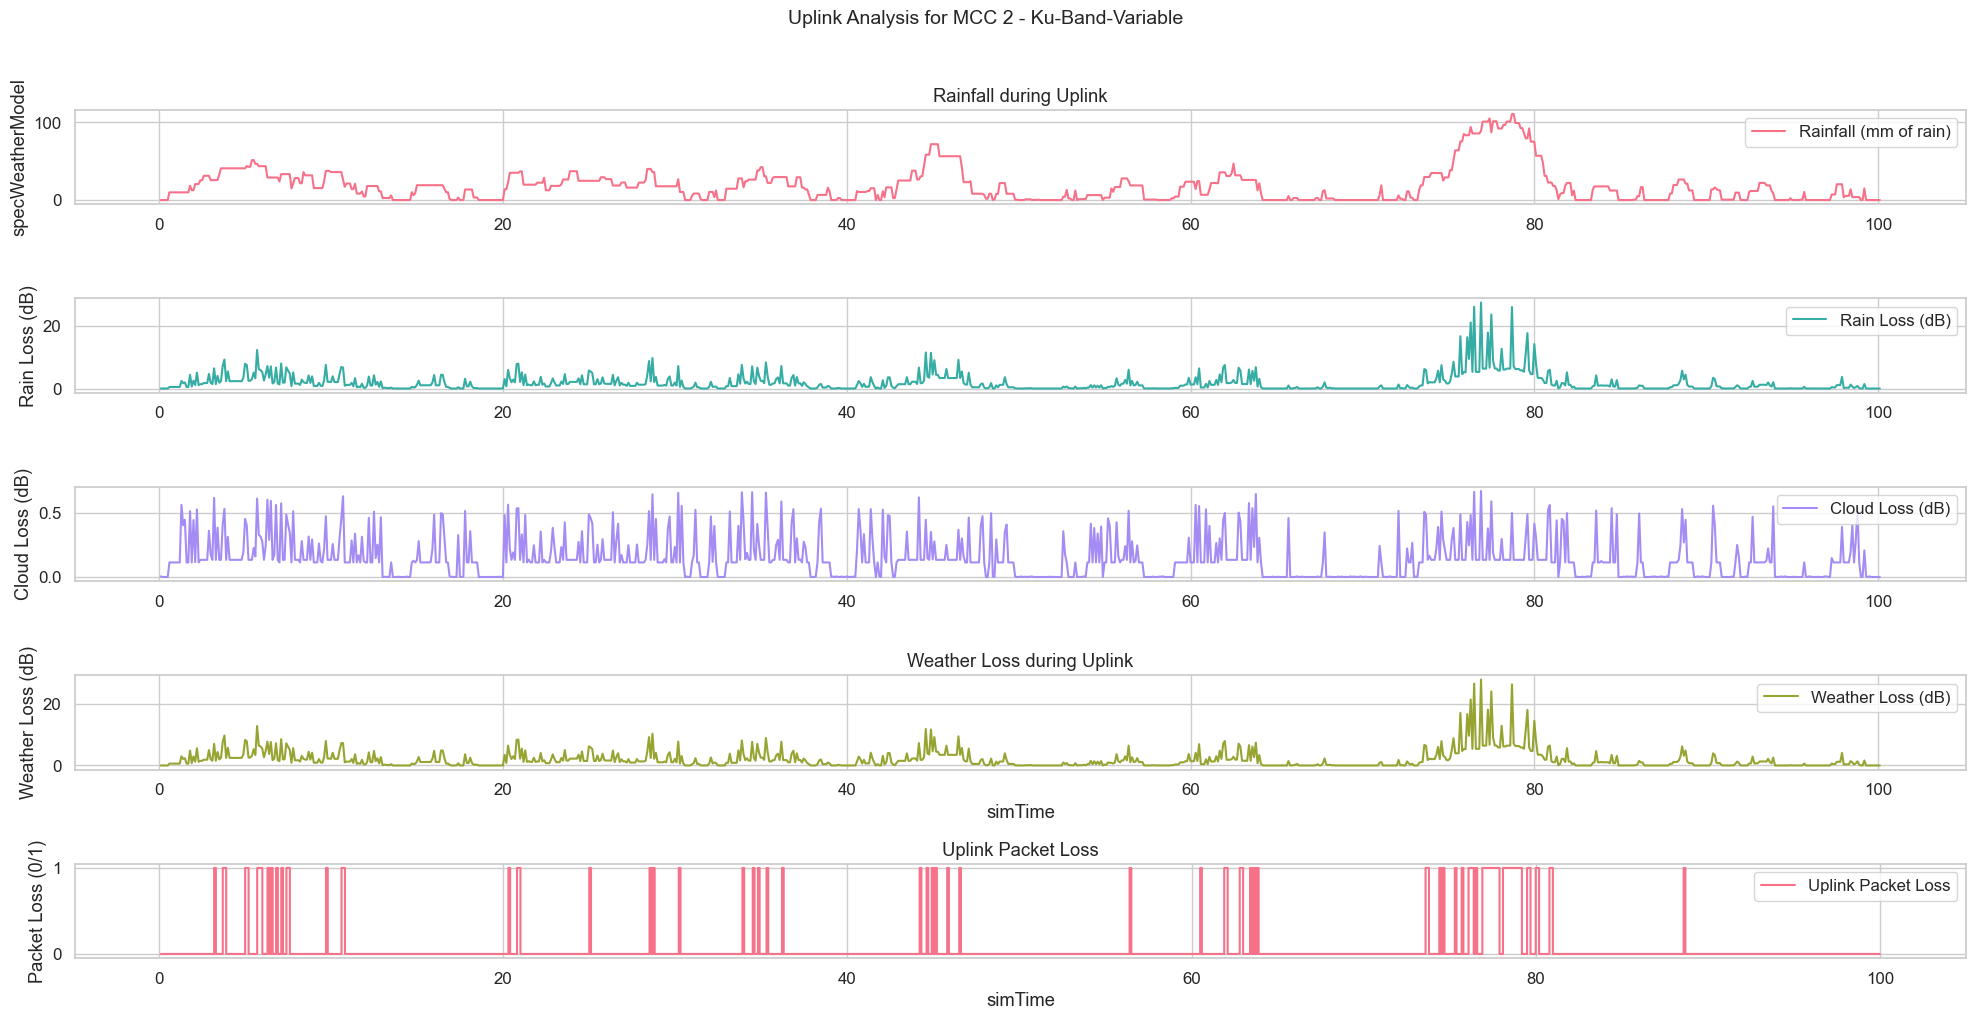

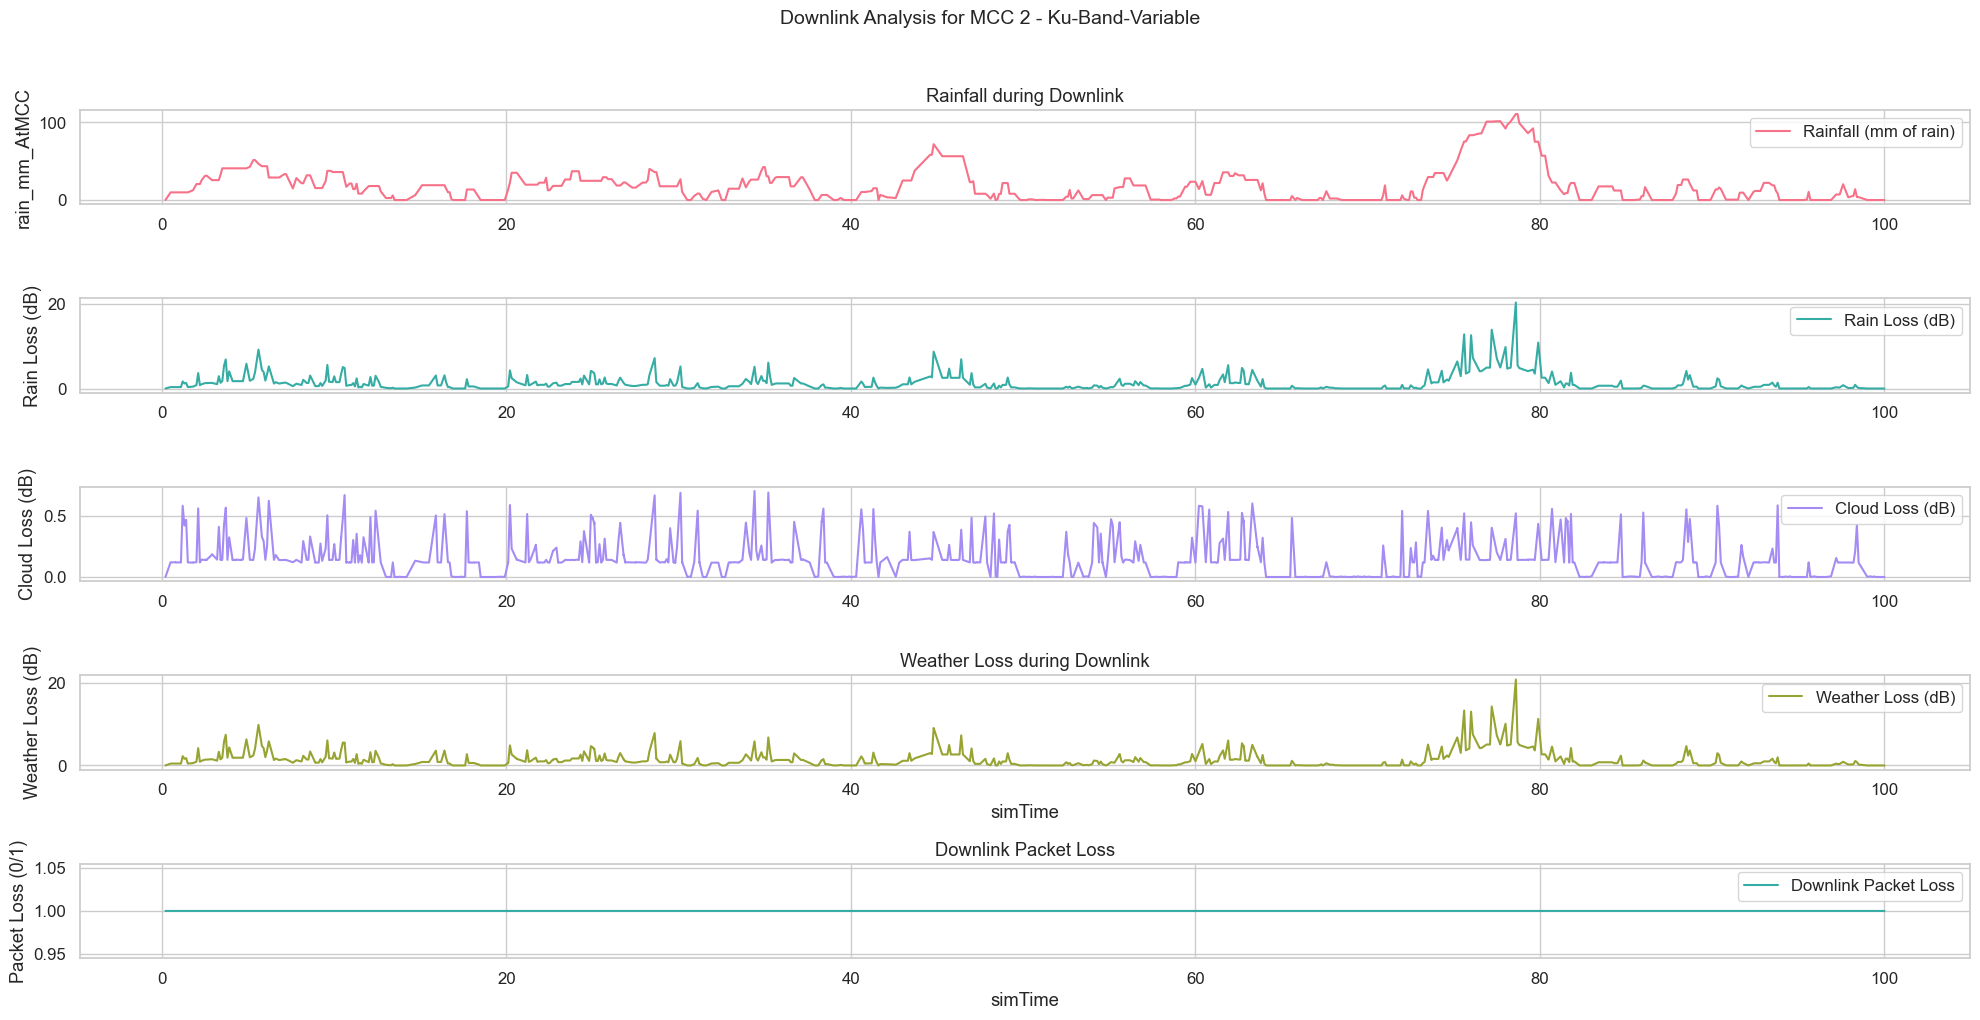

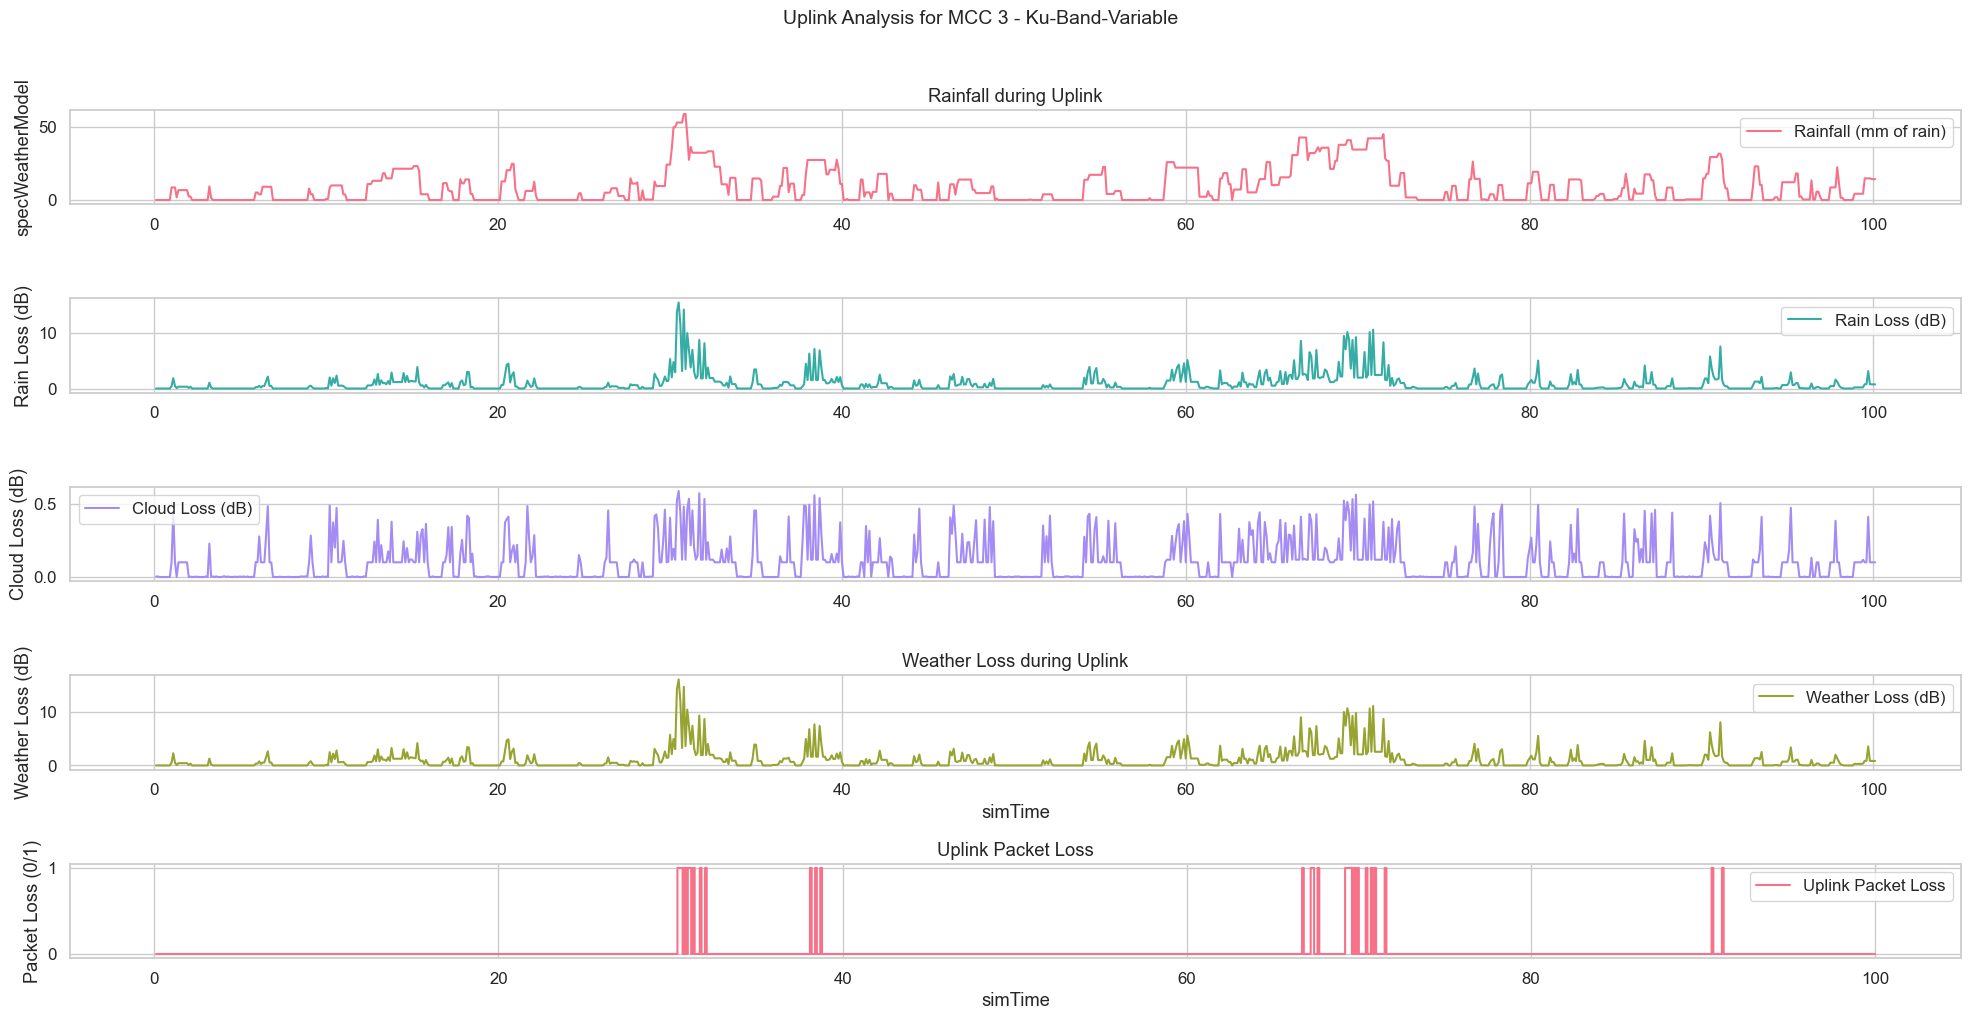

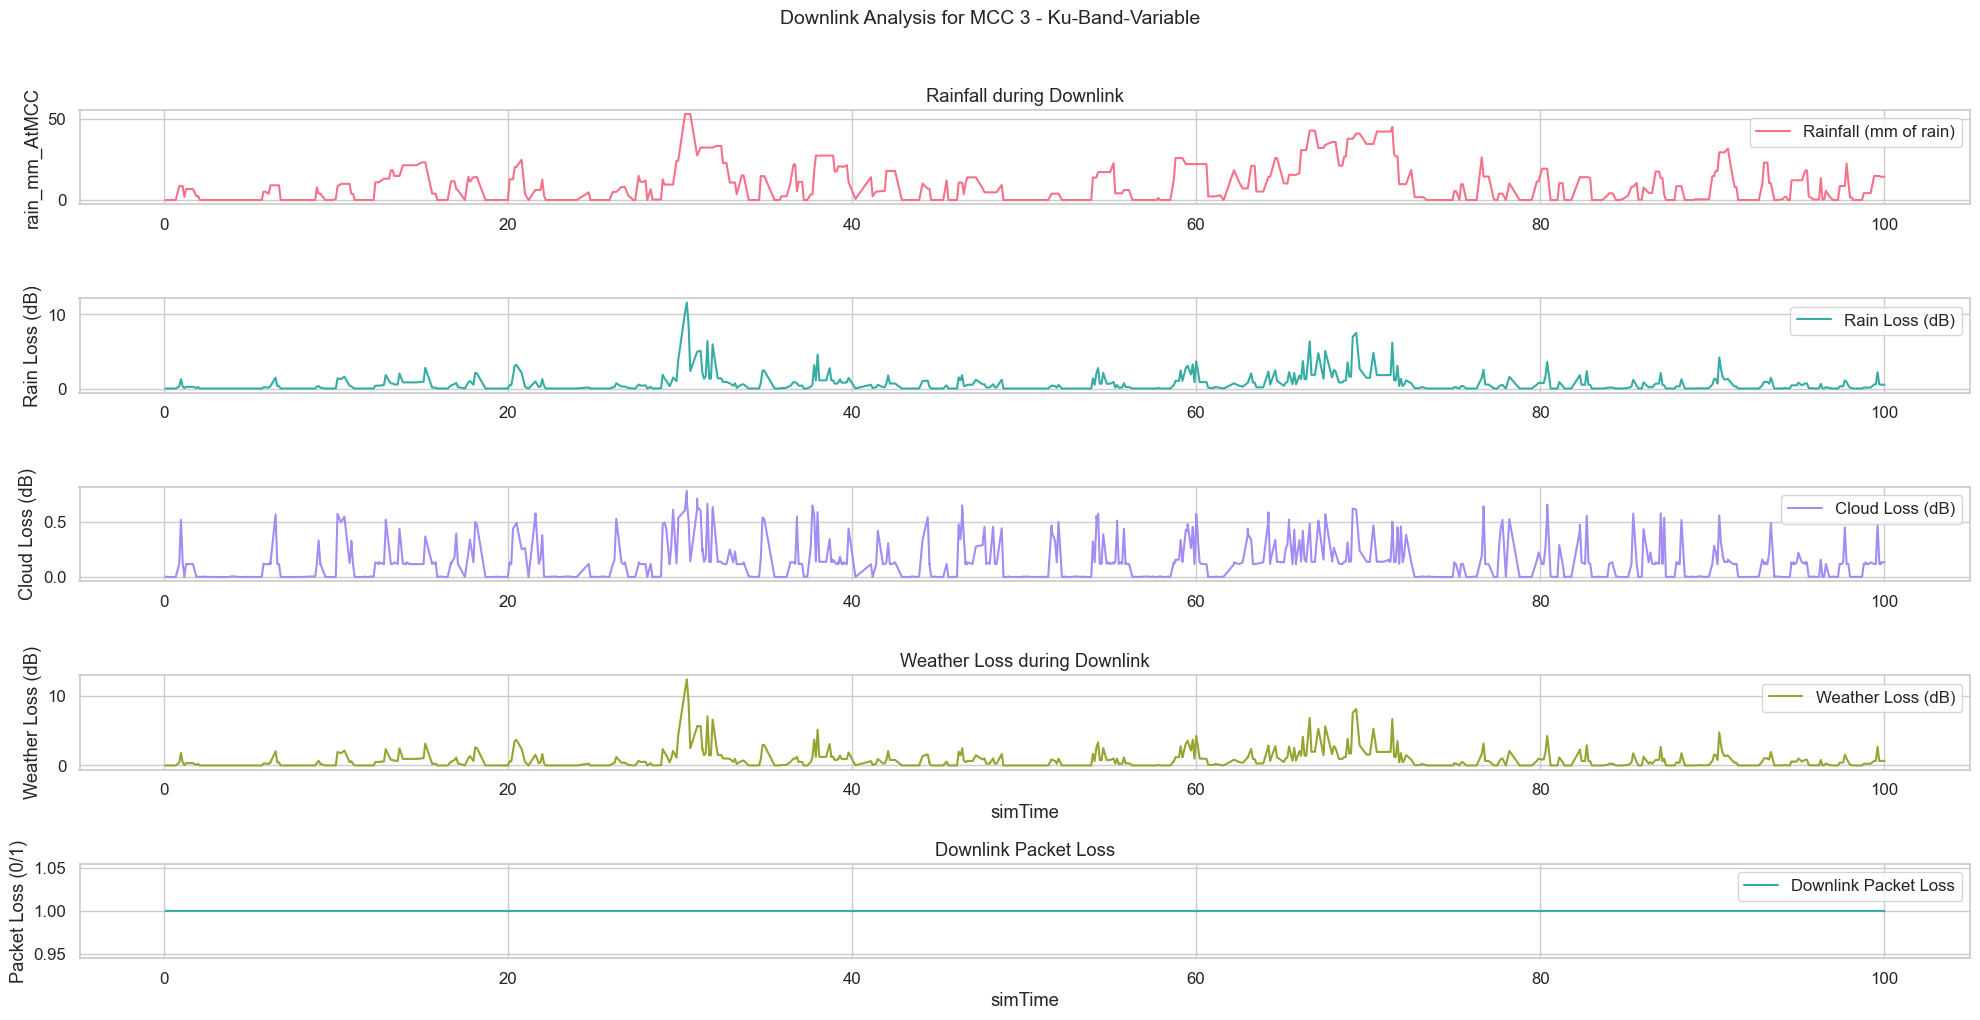

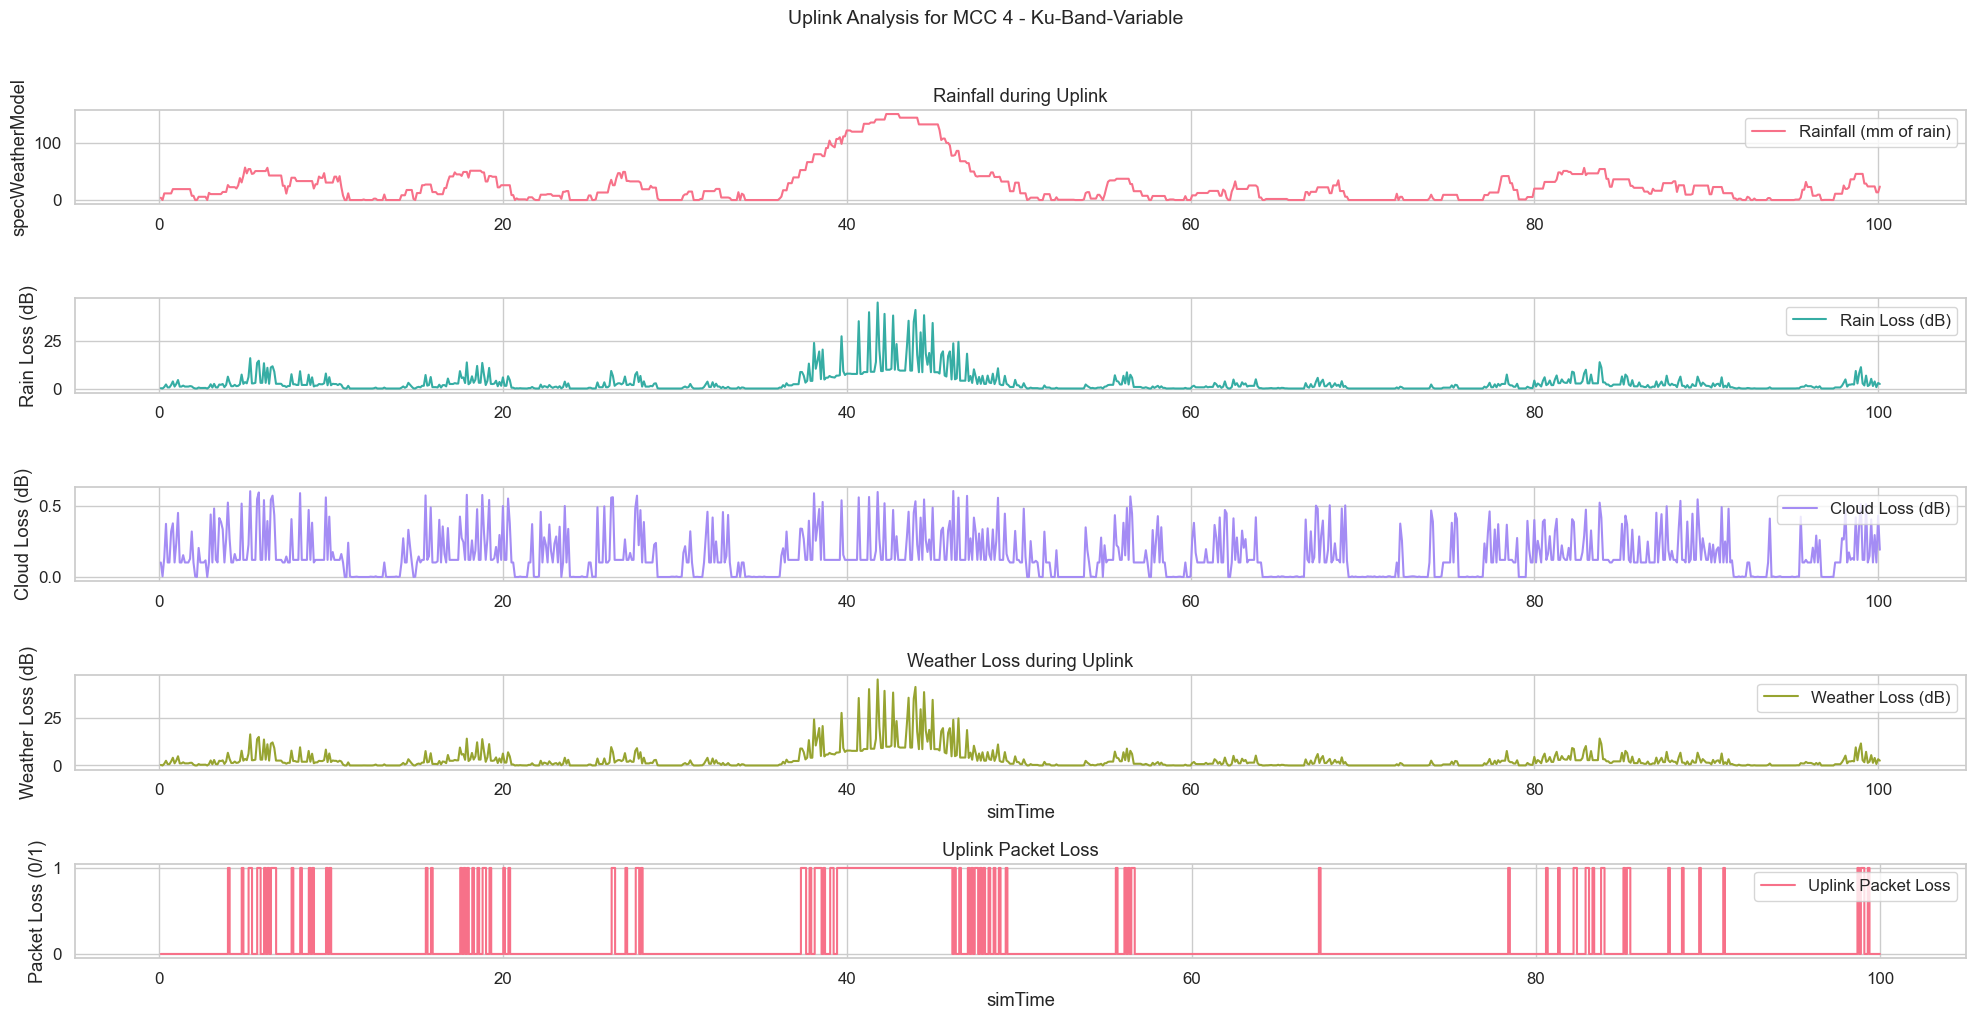

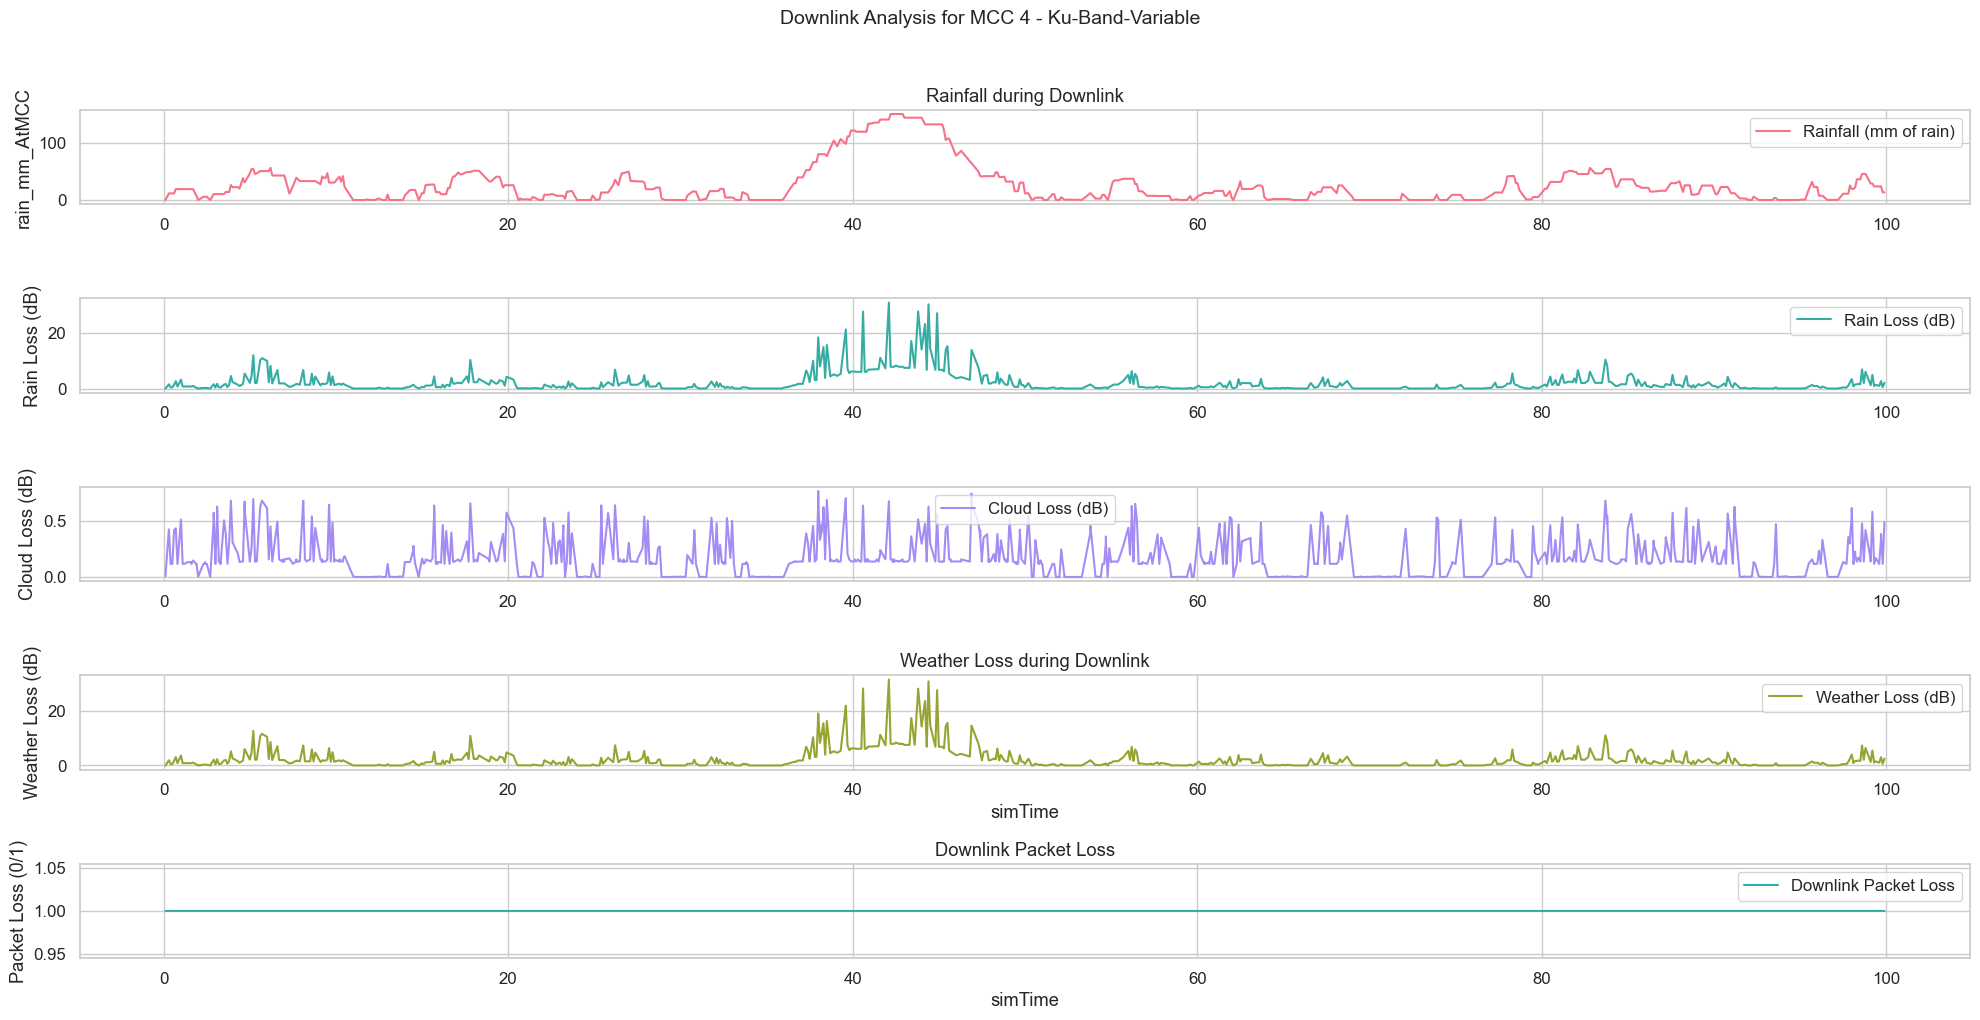

In [8]:
read_and_plot_files("Ku-Band-Variable")

## Ka-Band

In [9]:
read_files_v2("Ka-Band-Variable")

MCC 0: Packets Sent = 1042
MCC 0: Packets Lost = 306
MCC 1: Packets Sent = 1042
MCC 1: Packets Lost = 303
MCC 2: Packets Sent = 1042
MCC 2: Packets Lost = 334
MCC 3: Packets Sent = 1041
MCC 3: Packets Lost = 301
MCC 4: Packets Sent = 1041
MCC 4: Packets Lost = 342

Satellite: Packets Sent = 1736
Satellite: Packets Lost = 3464

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 4.999
Stddev uplink weather loss (dB): 8.336

Average uplink rain loss (dB): 4.676
Stddev uplink rain loss (dB): 8.068

Average uplink cloud loss (dB): 0.323
Stddev uplink cloud loss (dB): 0.371

Average uplink FSPL (dB): 212.223
Stddev uplink FSPL (dB): 0.063

Min uplink FSPL (dB): 212.167
Max uplink FSPL (dB): 212.341

DOWNLINK

Average downlink weather loss (dB): 2.882
Stddev downlink weather loss (dB): 4.425

Average downlink rain loss (dB): 2.720
Stddev downlink rain loss (dB): 4.281

Average downlink cloud loss (dB): 0.162
Stddev downlink cloud loss (dB): 0.190

Average downlink FSPL (dB): 209.619
Stdd

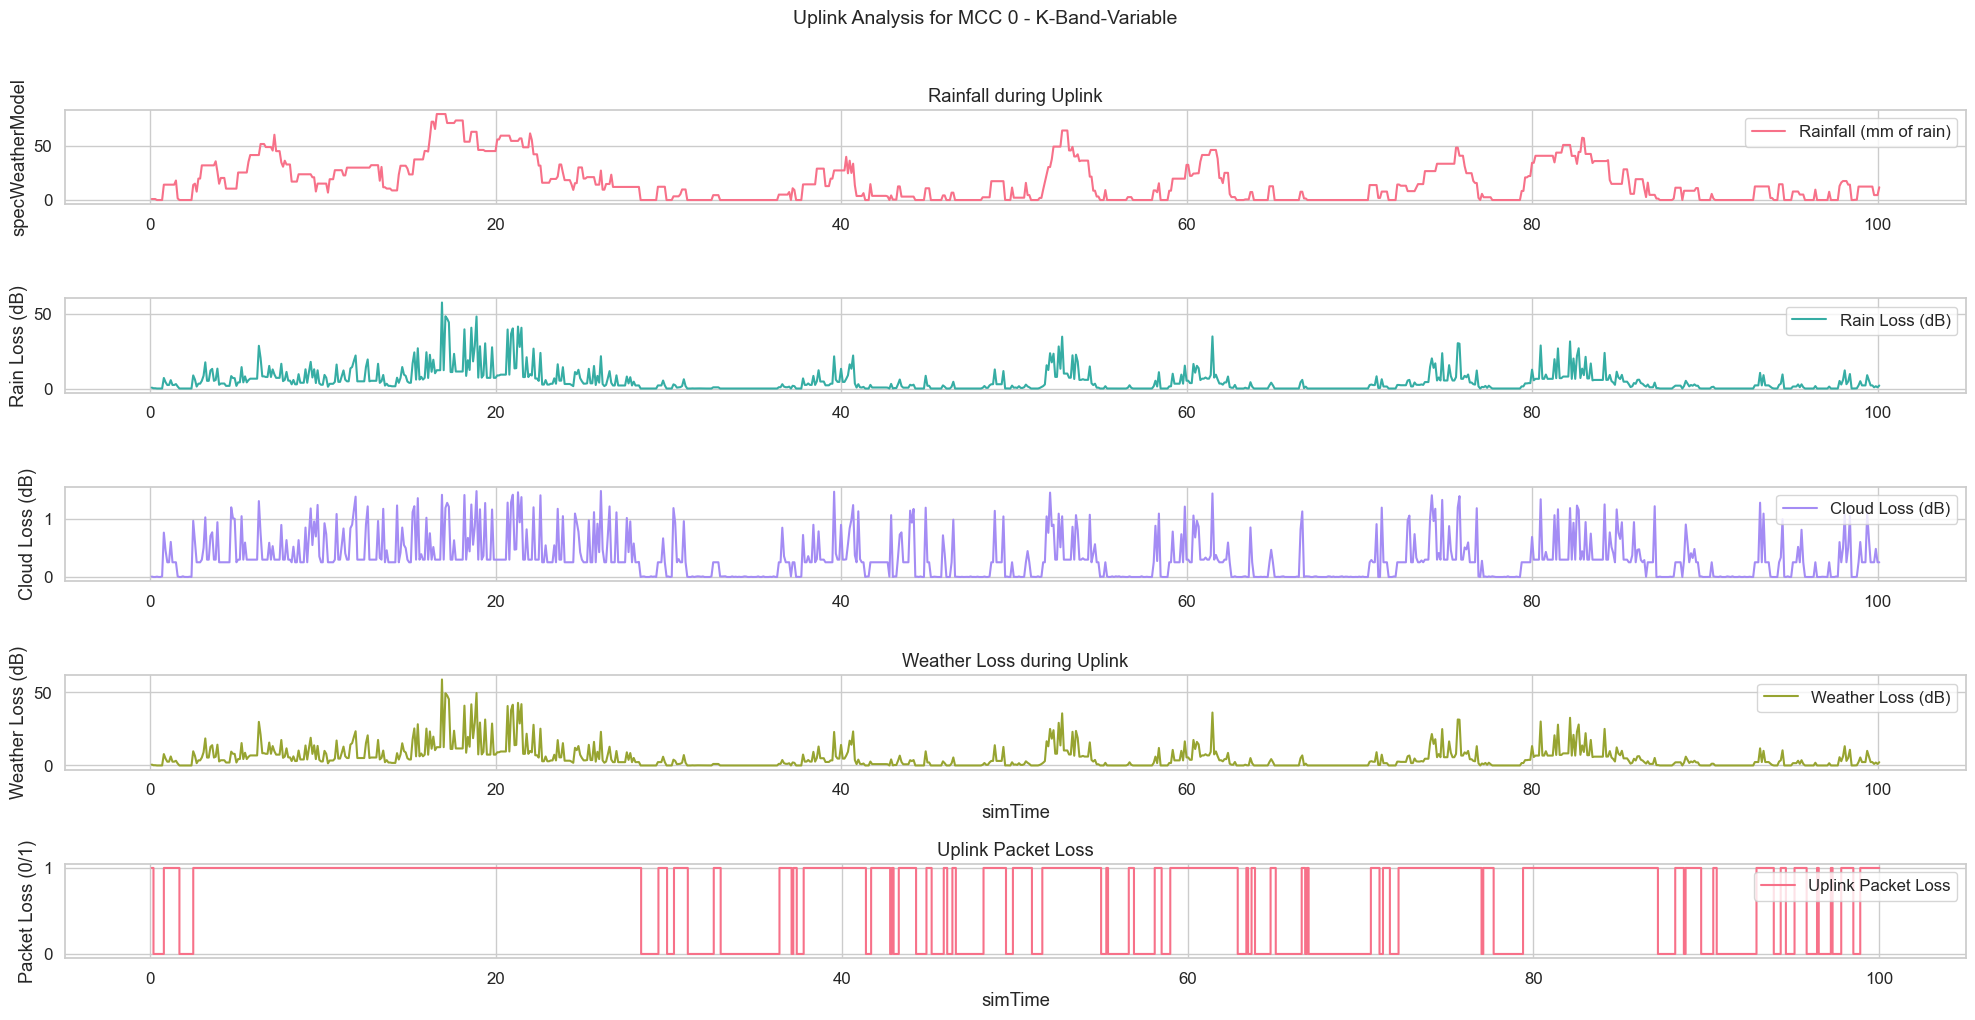

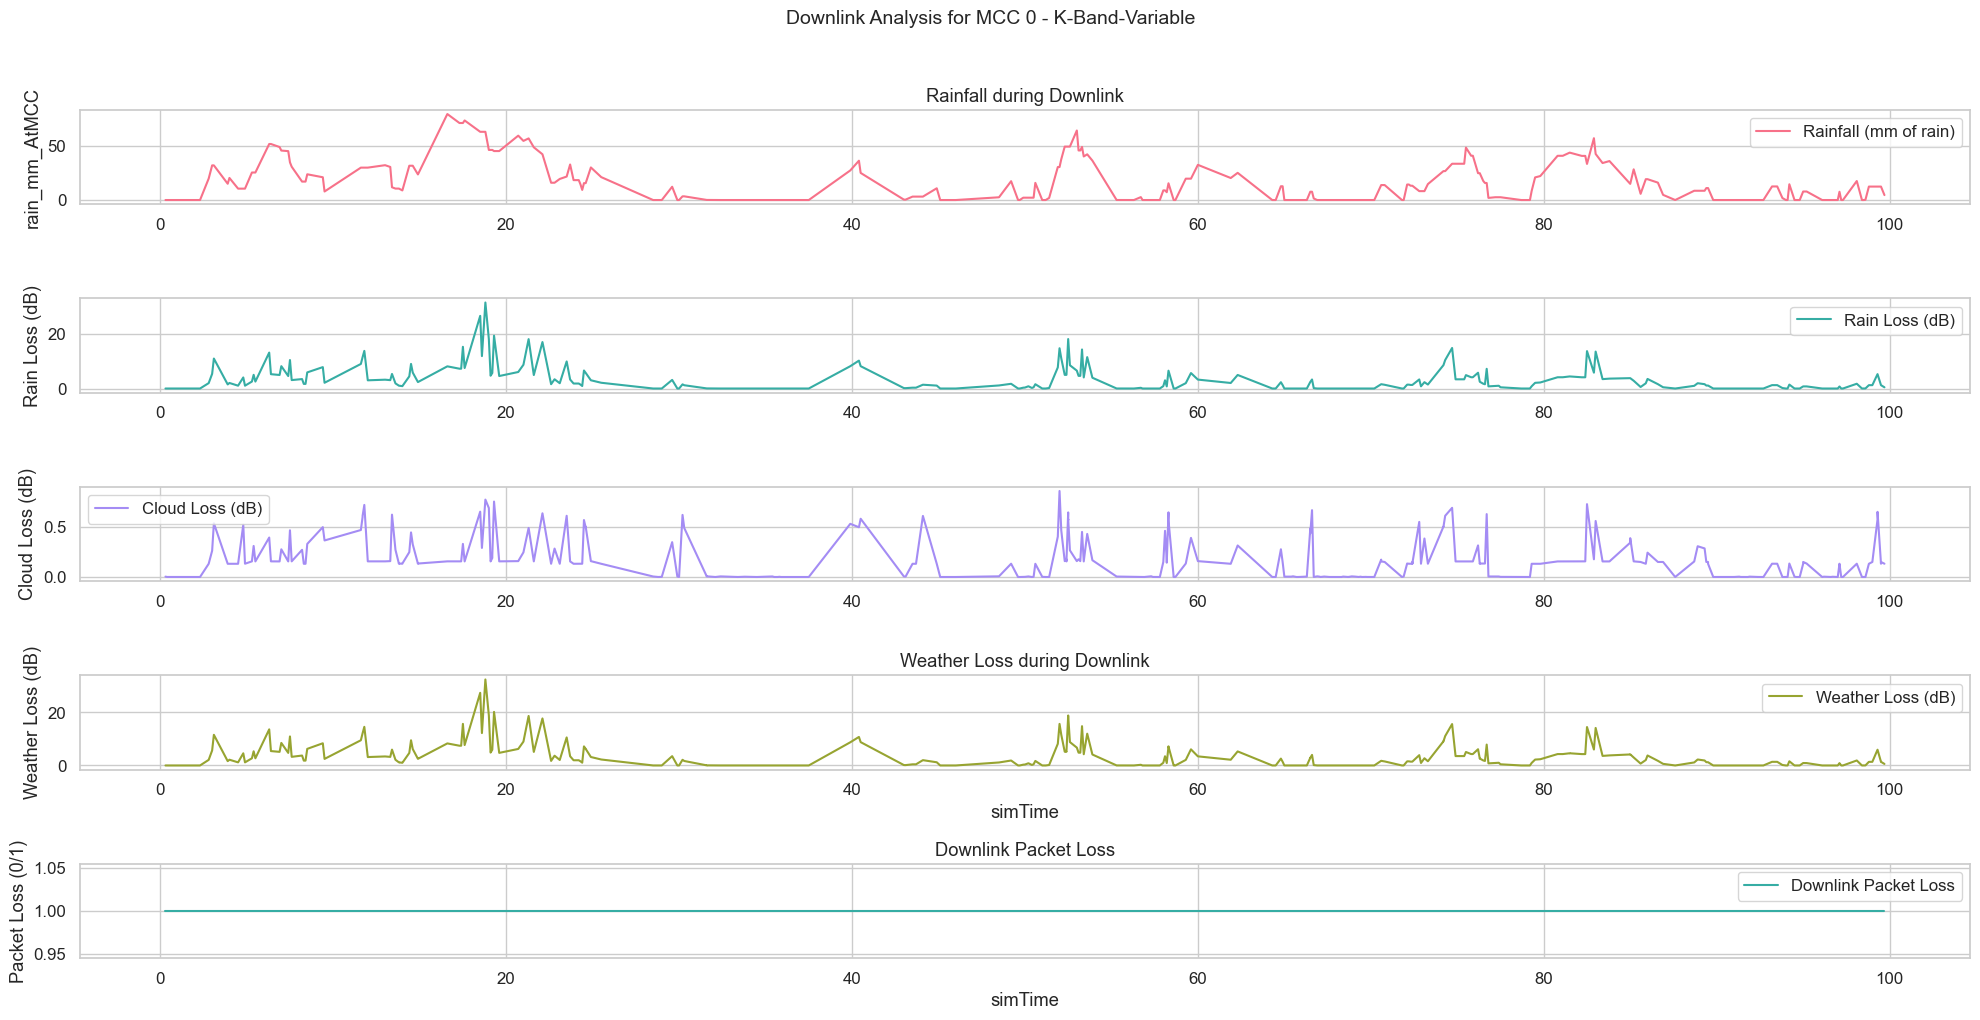

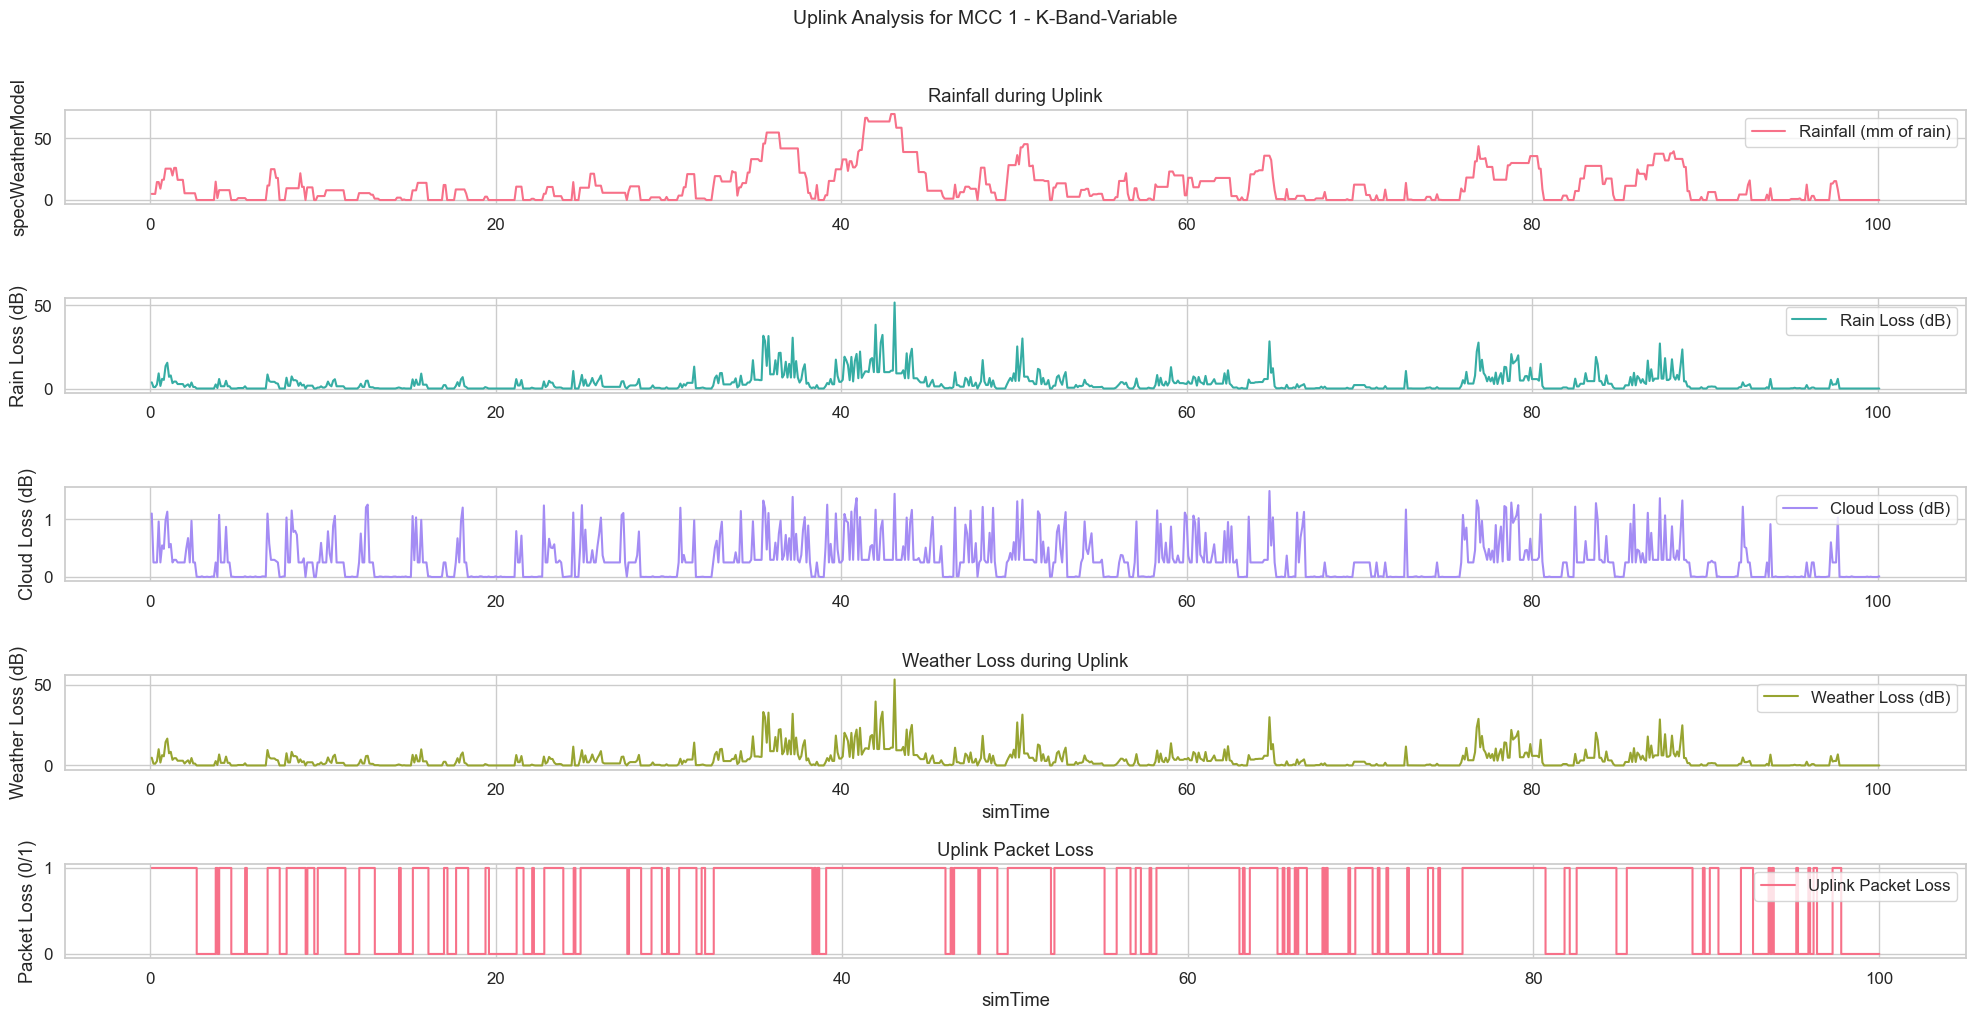

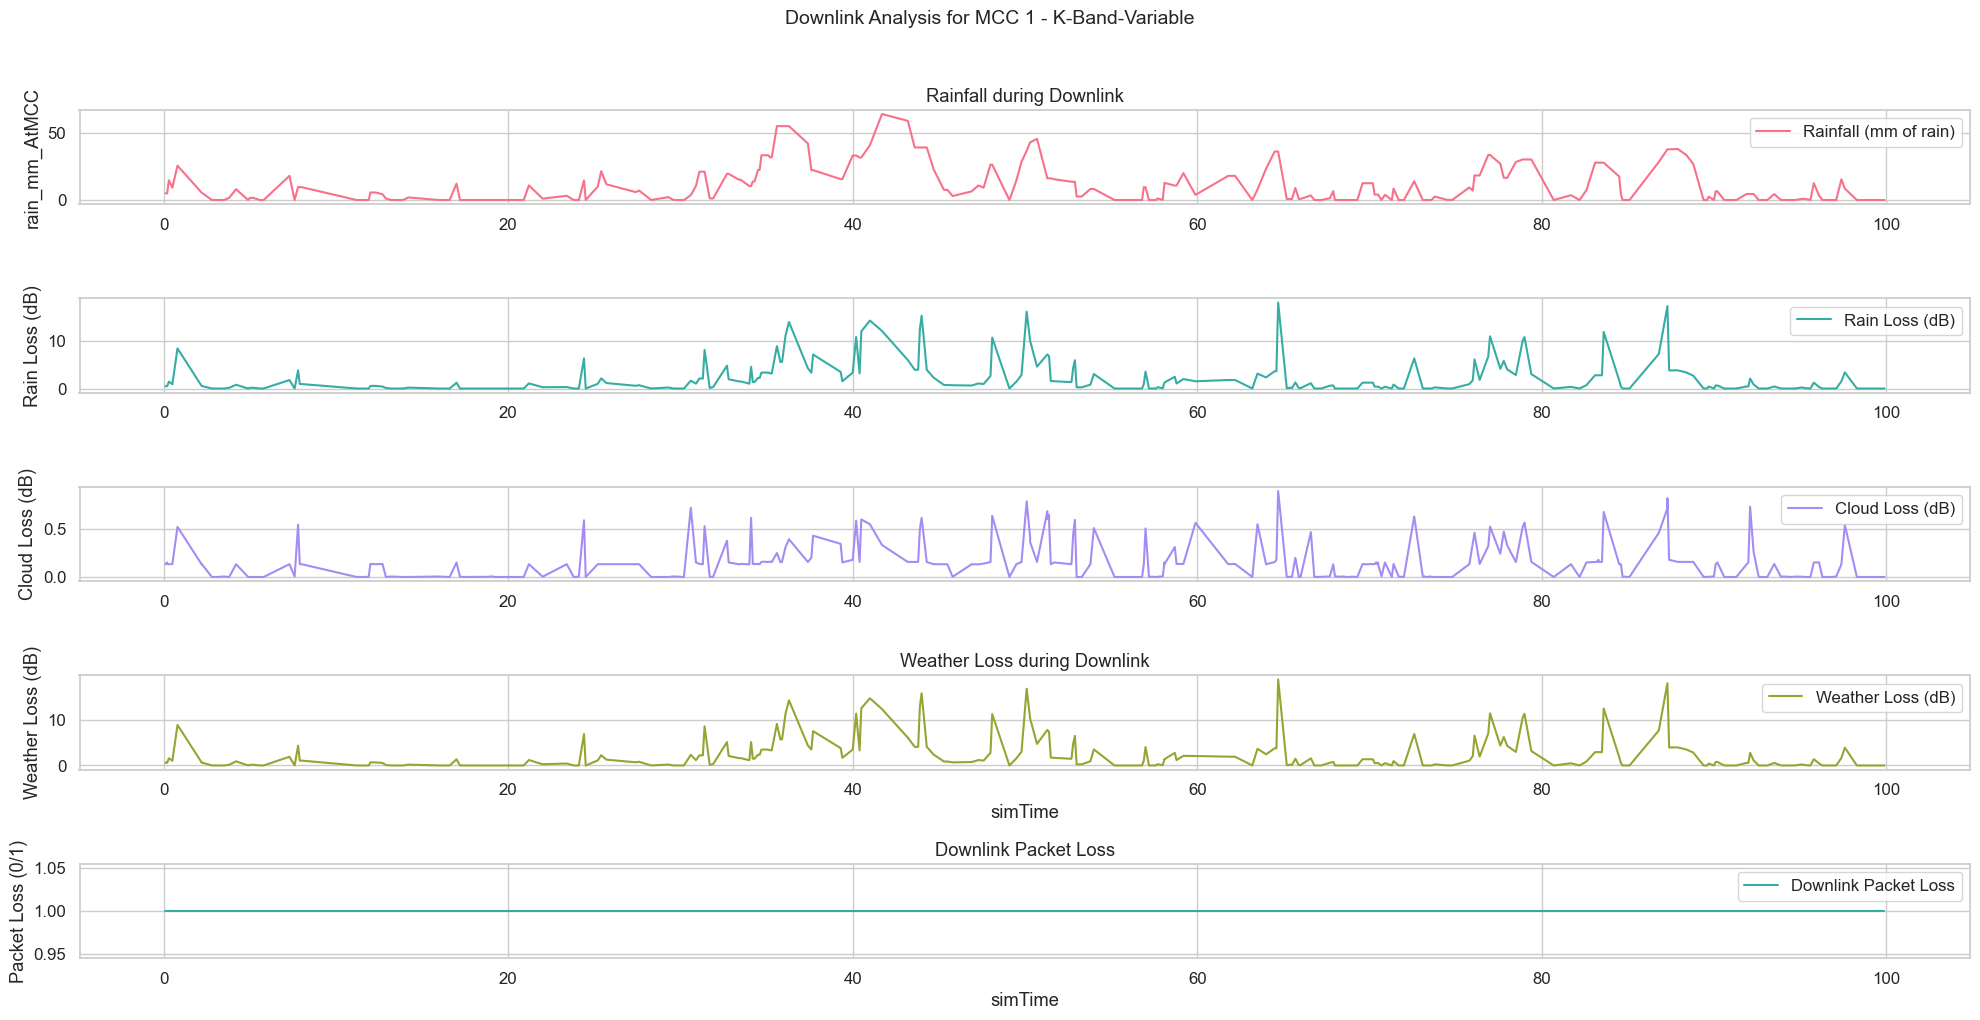

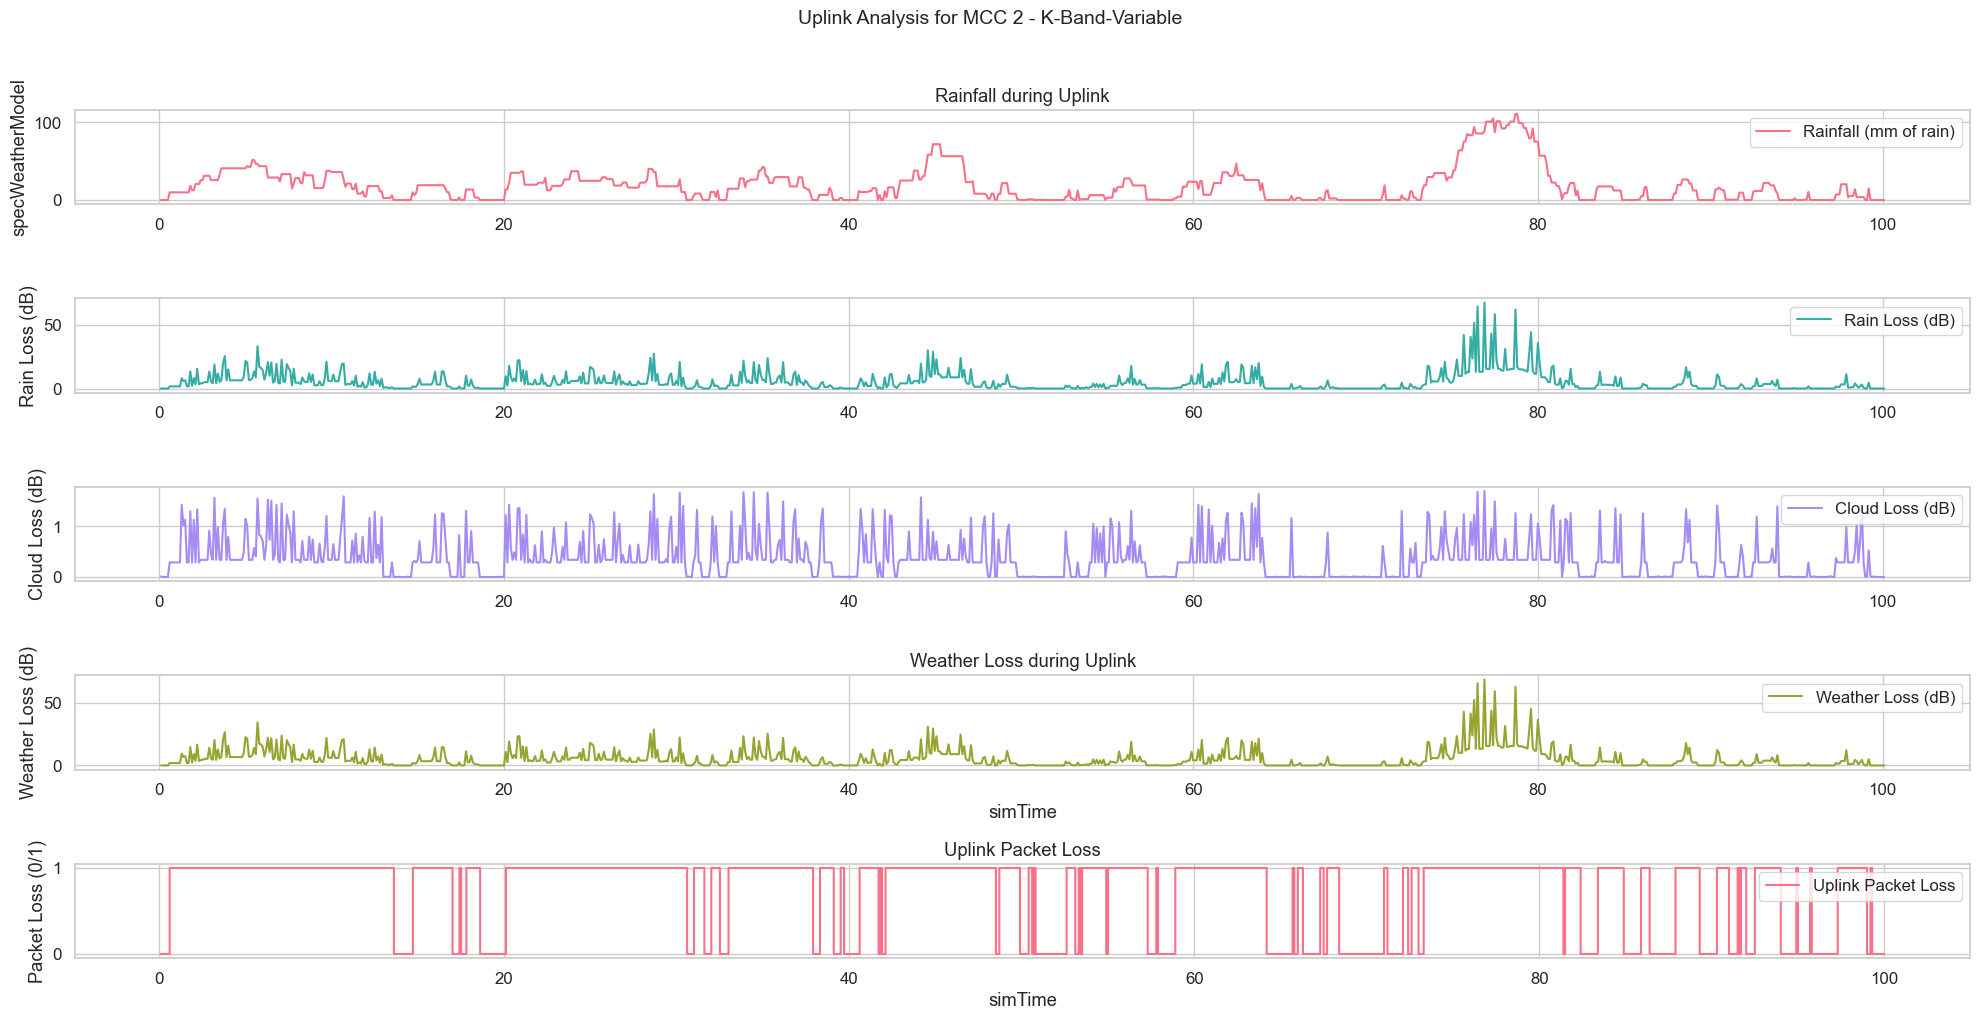

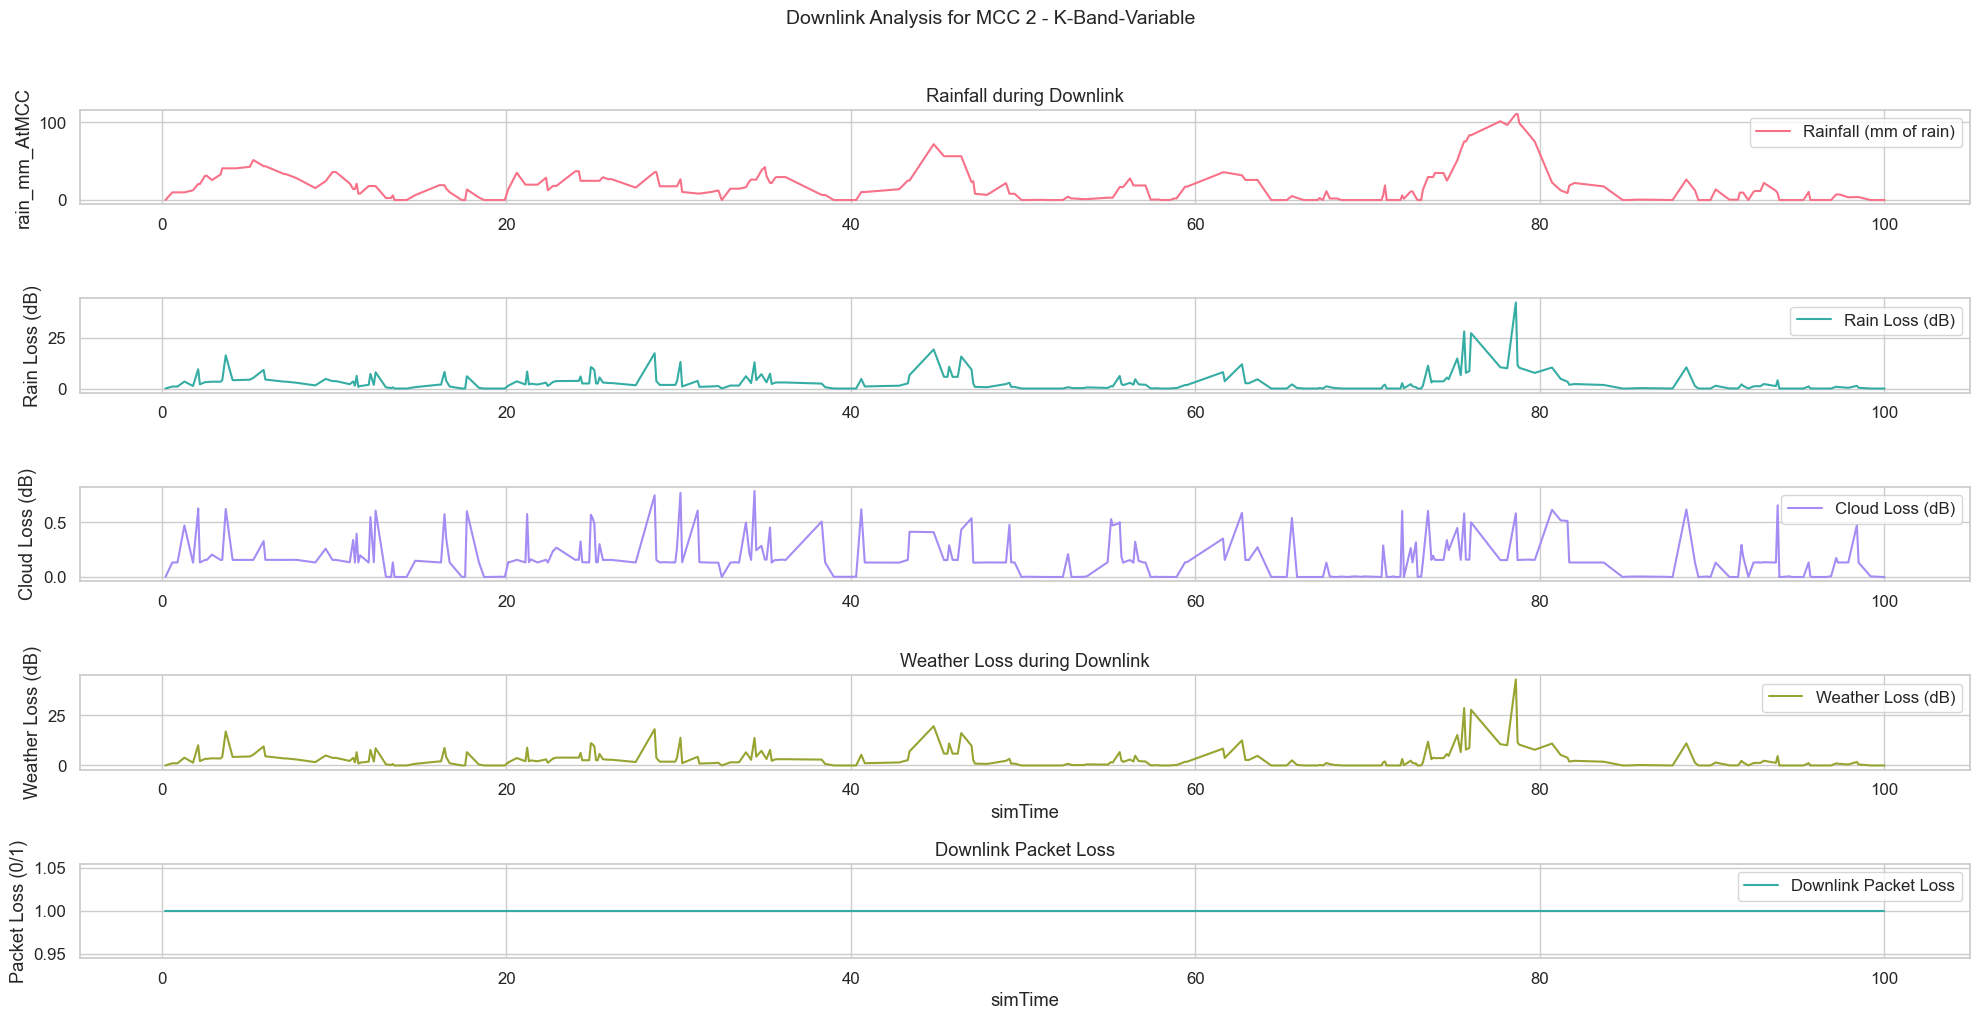

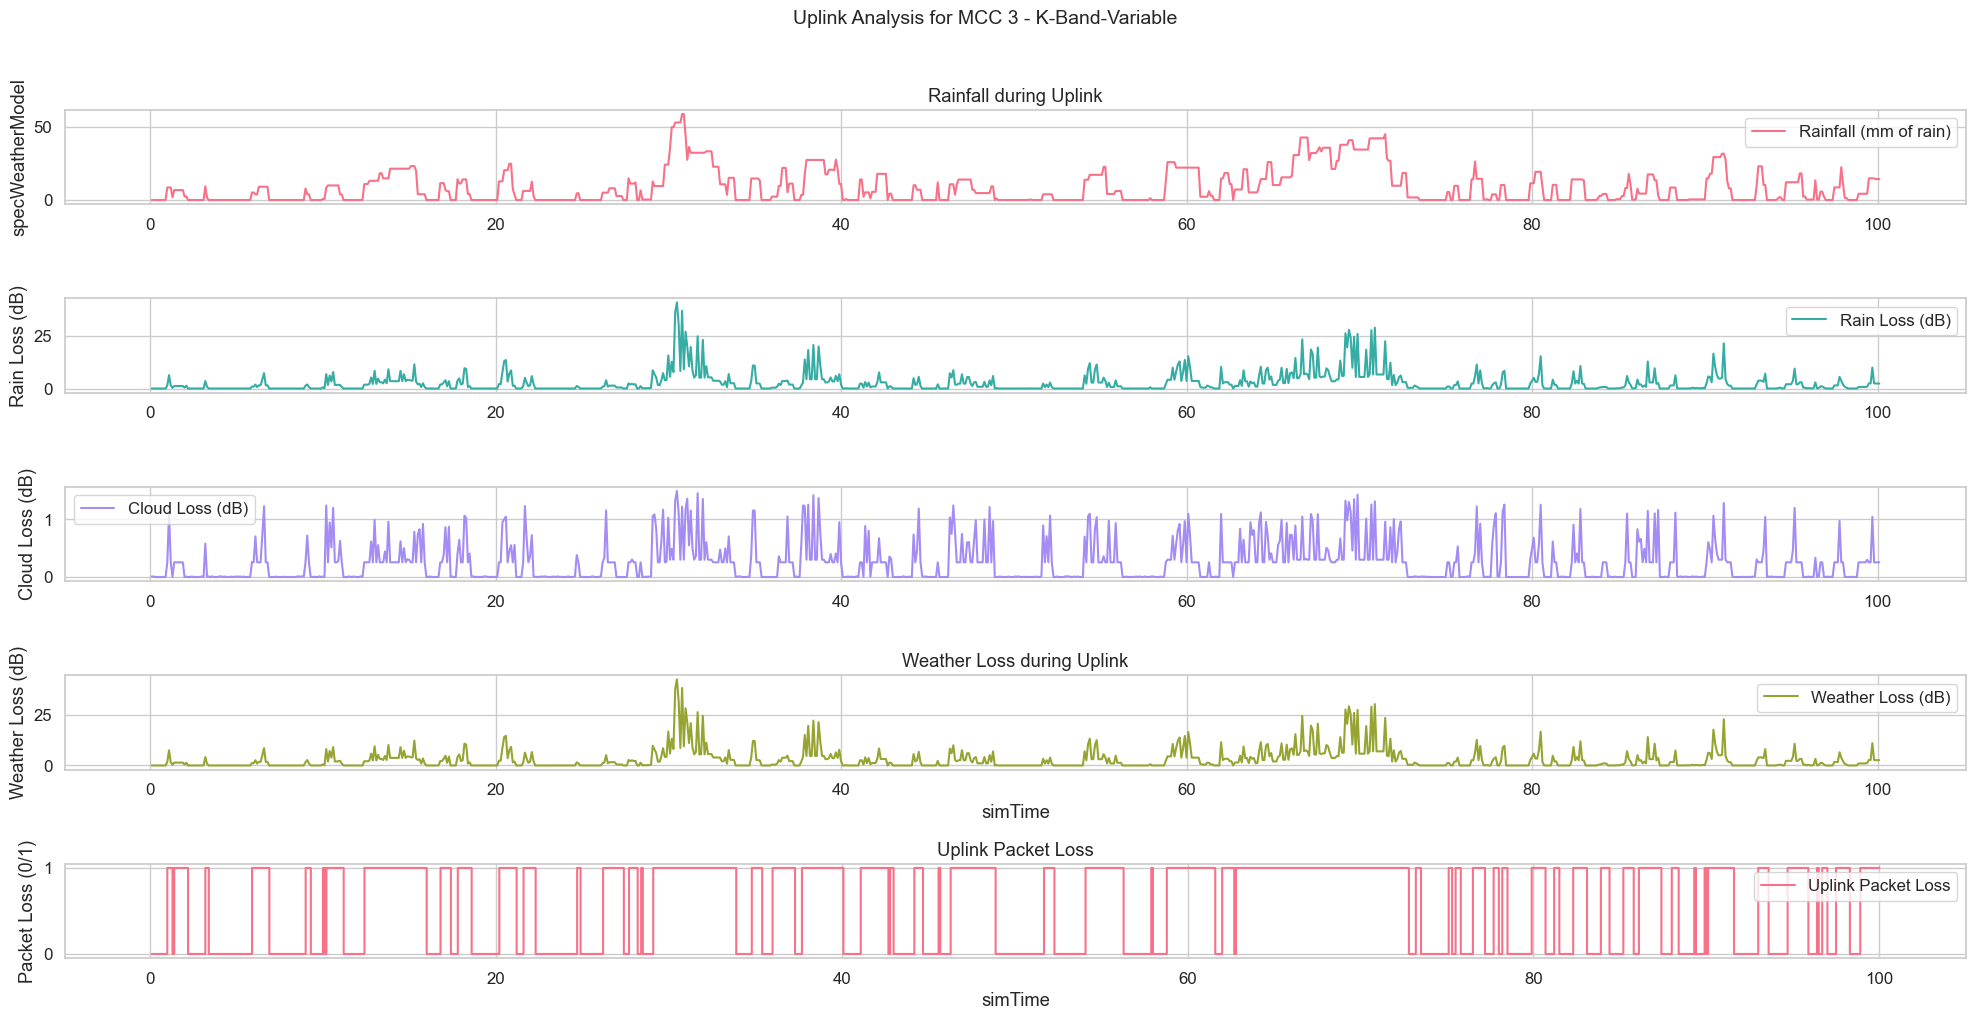

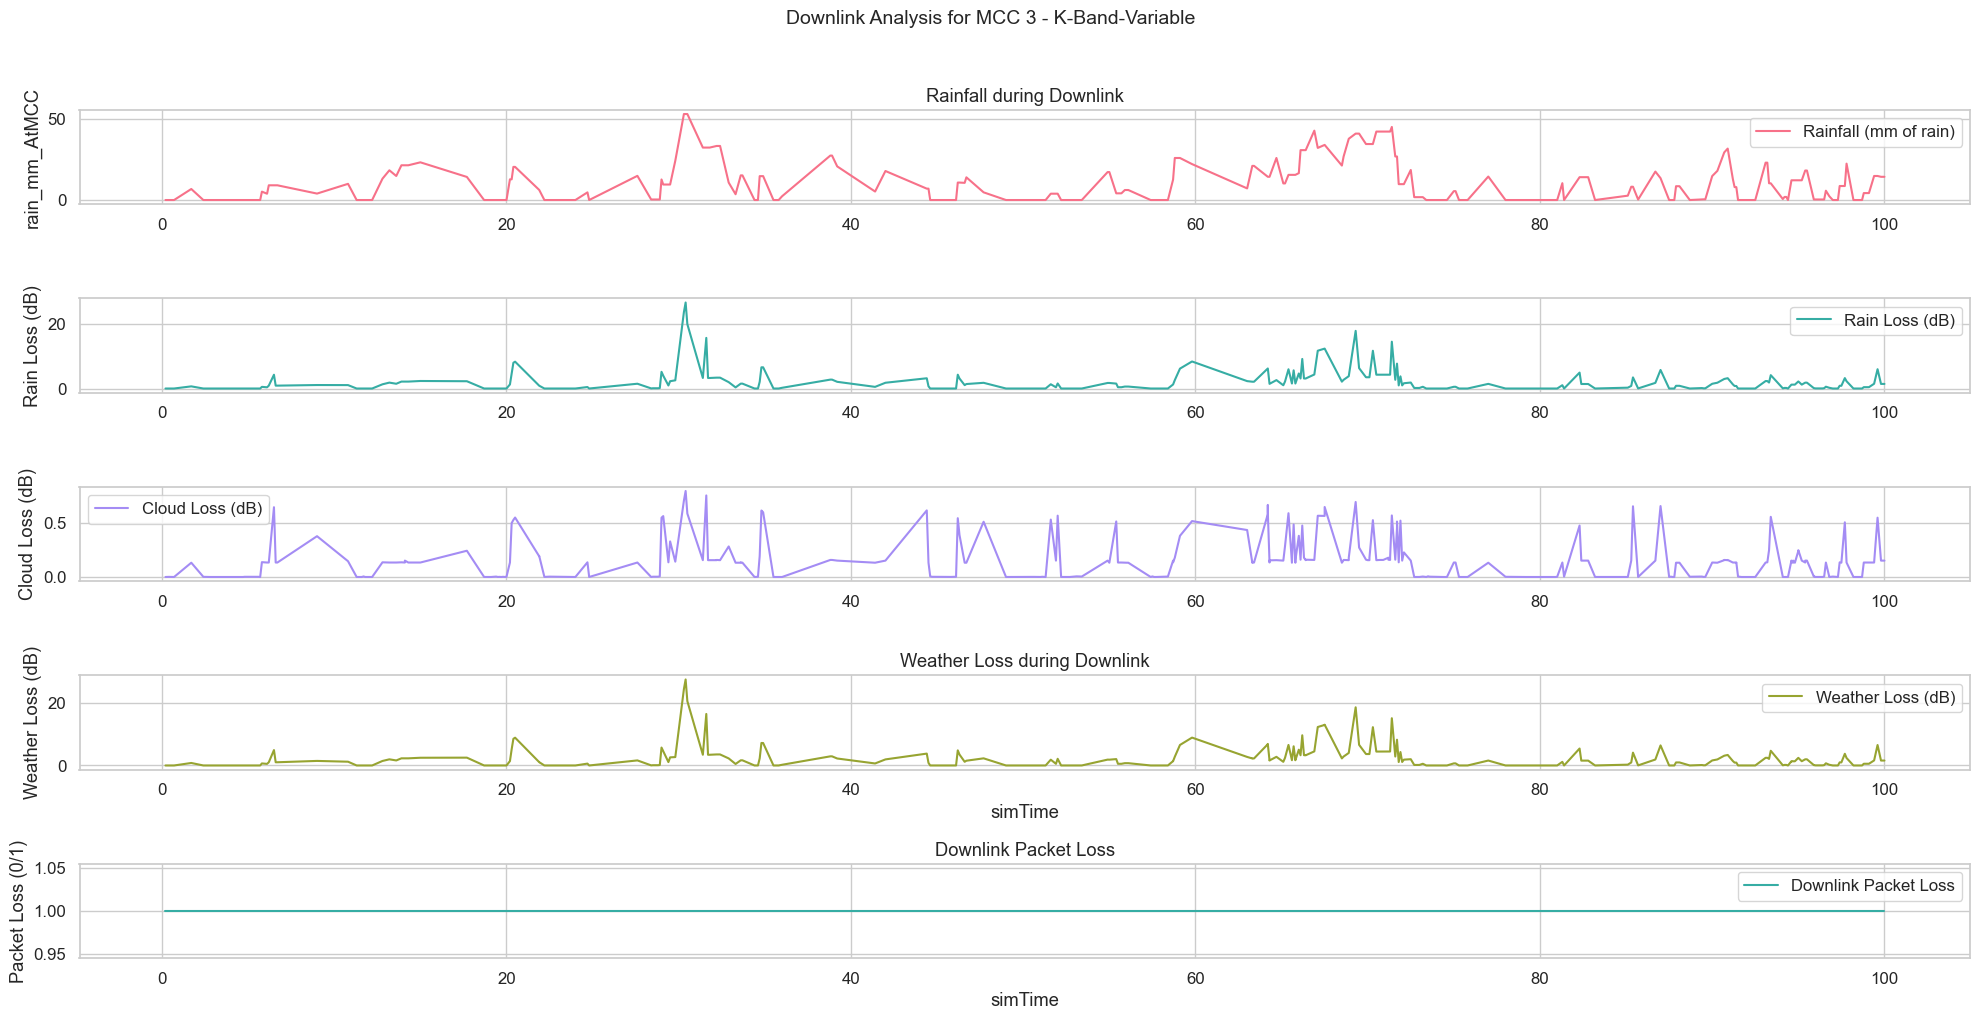

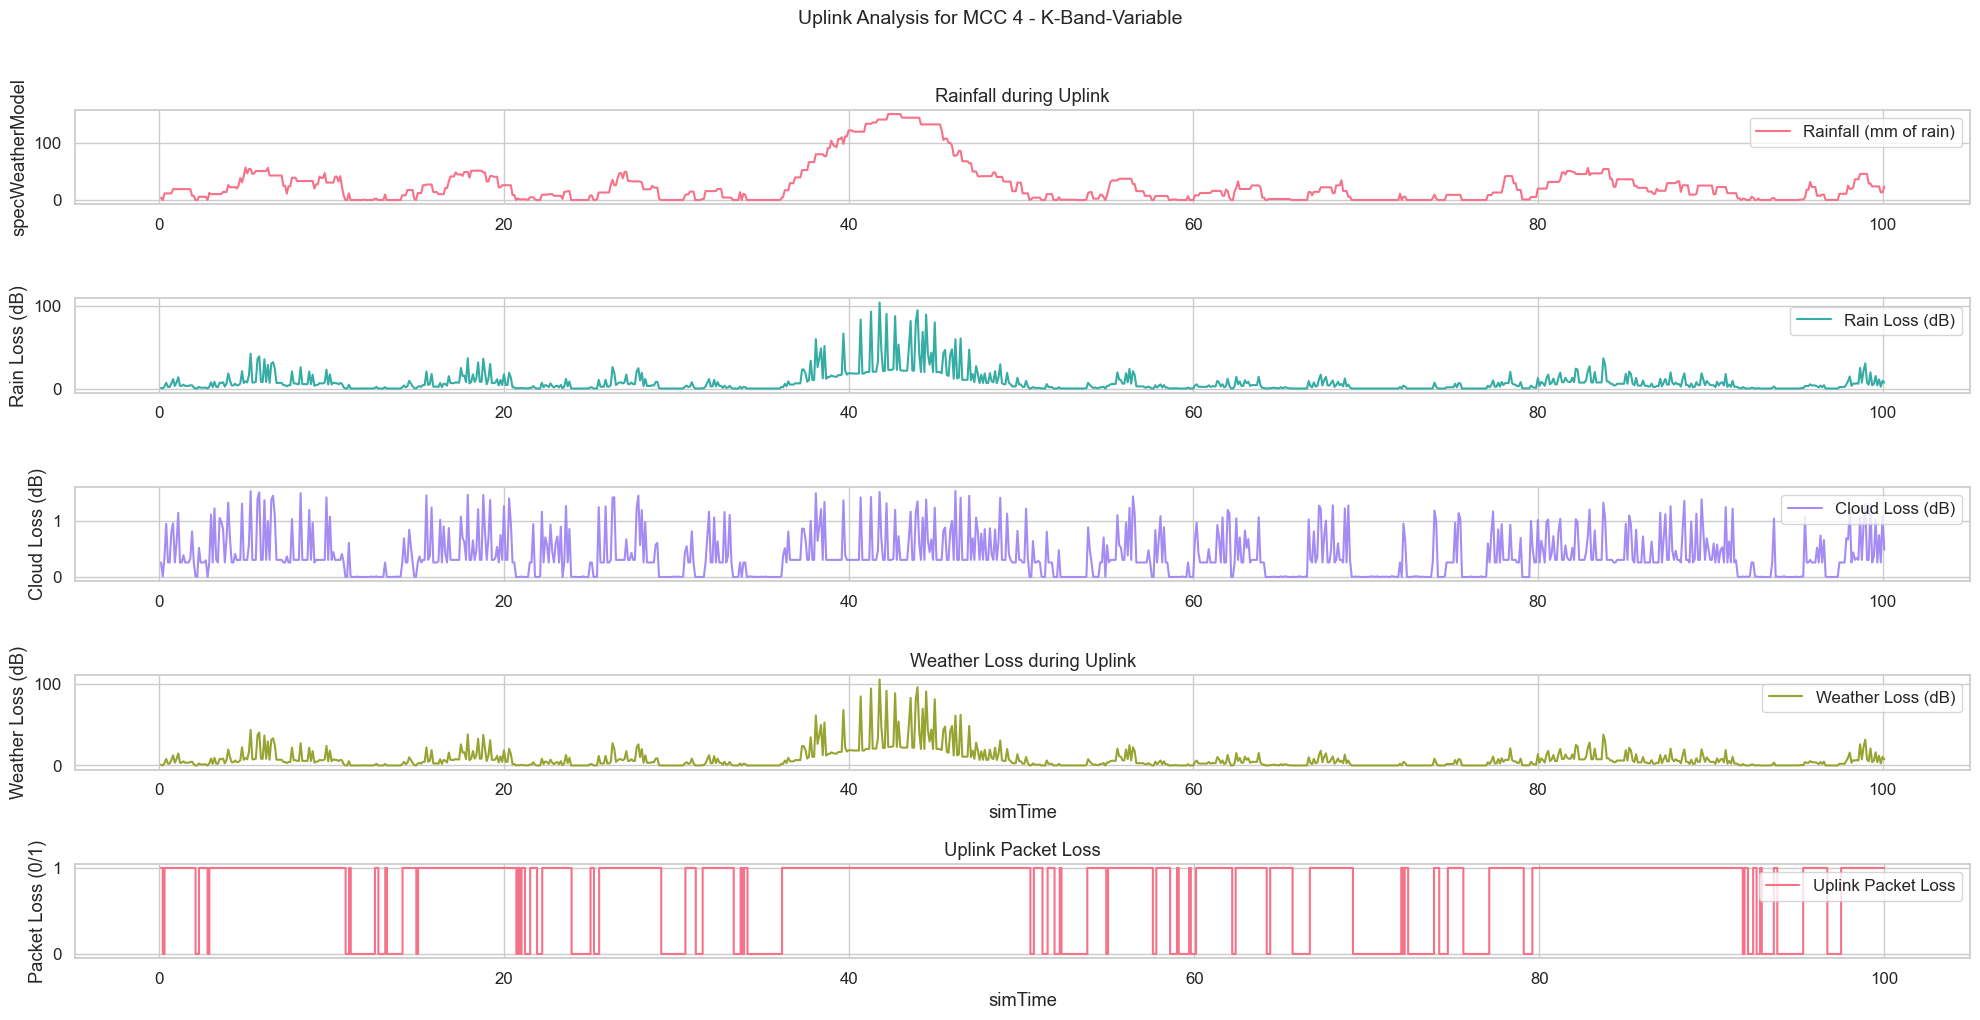

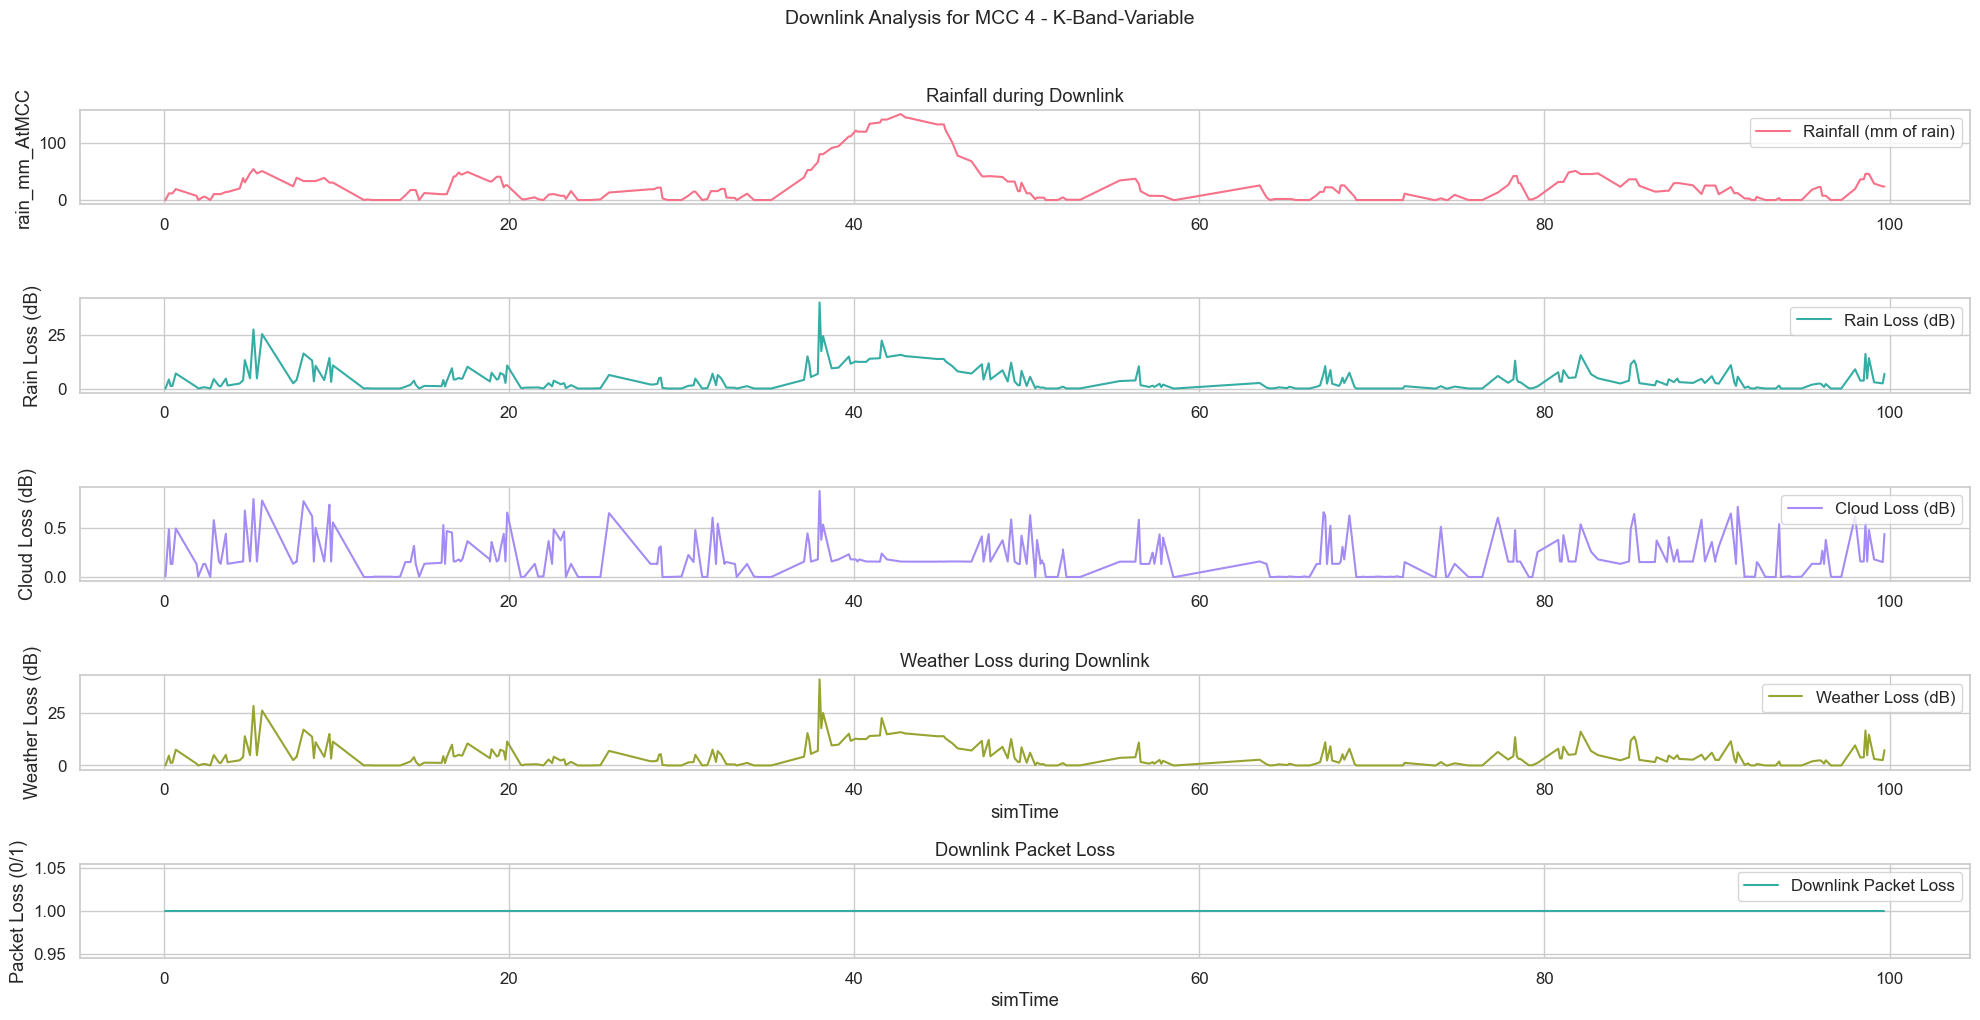

In [10]:
read_and_plot_files("Ka-Band-Variable")

# Static Weather Results

## C-Band

In [11]:
read_files_v2("C-Band-Sunny")

MCC 0: Packets Sent = 1033
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1033
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1033
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1033
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1033
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 5160
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.010
Stddev uplink weather loss (dB): 0.007

Average uplink rain loss (dB): 0.000
Stddev uplink rain loss (dB): 0.000

Average uplink cloud loss (dB): 0.010
Stddev uplink cloud loss (dB): 0.007

Average uplink FSPL (dB): 199.226
Stddev uplink FSPL (dB): 0.091

Min uplink FSPL (dB): 199.103
Max uplink FSPL (dB): 199.344

DOWNLINK

Average downlink weather loss (dB): 0.020
Stddev downlink weather loss (dB): 0.014

Average downlink rain loss (dB): 0.000
Stddev downlink rain loss (dB): 0.000

Average downlink cloud loss (dB): 0.020
Stddev downlink cloud loss (dB): 0.014

Average downlink FSPL (dB): 195.749
Stddev downlink F

In [12]:
read_files_v2("C-Band-Rainy")

MCC 0: Packets Sent = 1016
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1016
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1016
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1016
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1016
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 5075
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.024
Stddev uplink weather loss (dB): 0.016

Average uplink rain loss (dB): 0.014
Stddev uplink rain loss (dB): 0.009

Average uplink cloud loss (dB): 0.010
Stddev uplink cloud loss (dB): 0.007

Average uplink FSPL (dB): 199.226
Stddev uplink FSPL (dB): 0.091

Min uplink FSPL (dB): 199.103
Max uplink FSPL (dB): 199.344

DOWNLINK

Average downlink weather loss (dB): 0.023
Stddev downlink weather loss (dB): 0.016

Average downlink rain loss (dB): 0.003
Stddev downlink rain loss (dB): 0.002

Average downlink cloud loss (dB): 0.020
Stddev downlink cloud loss (dB): 0.014

Average downlink FSPL (dB): 195.749
Stddev downlink F

In [13]:
read_files_v2("C-Band-HeavyRain")

MCC 0: Packets Sent = 1077
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1077
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1077
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1077
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1077
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 5377
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.186
Stddev uplink weather loss (dB): 0.127

Average uplink rain loss (dB): 0.176
Stddev uplink rain loss (dB): 0.120

Average uplink cloud loss (dB): 0.010
Stddev uplink cloud loss (dB): 0.007

Average uplink FSPL (dB): 199.226
Stddev uplink FSPL (dB): 0.091

Min uplink FSPL (dB): 199.103
Max uplink FSPL (dB): 199.344

DOWNLINK

Average downlink weather loss (dB): 0.032
Stddev downlink weather loss (dB): 0.022

Average downlink rain loss (dB): 0.012
Stddev downlink rain loss (dB): 0.009

Average downlink cloud loss (dB): 0.020
Stddev downlink cloud loss (dB): 0.014

Average downlink FSPL (dB): 195.749
Stddev downlink F

## Ku-Band

In [14]:
read_files_v2("Ku-Band-Sunny")

MCC 0: Packets Sent = 1033
MCC 0: Packets Lost = 852
MCC 1: Packets Sent = 1033
MCC 1: Packets Lost = 919
MCC 2: Packets Sent = 1033
MCC 2: Packets Lost = 899
MCC 3: Packets Sent = 1033
MCC 3: Packets Lost = 920
MCC 4: Packets Sent = 1033
MCC 4: Packets Lost = 893

Satellite: Packets Sent = 5160
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.002
Stddev uplink weather loss (dB): 0.002

Average uplink rain loss (dB): 0.000
Stddev uplink rain loss (dB): 0.000

Average uplink cloud loss (dB): 0.002
Stddev uplink cloud loss (dB): 0.002

Average uplink FSPL (dB): 206.537
Stddev uplink FSPL (dB): 0.068

Min uplink FSPL (dB): 206.462
Max uplink FSPL (dB): 206.654

DOWNLINK

Average downlink weather loss (dB): 0.003
Stddev downlink weather loss (dB): 0.002

Average downlink rain loss (dB): 0.000
Stddev downlink rain loss (dB): 0.000

Average downlink cloud loss (dB): 0.003
Stddev downlink cloud loss (dB): 0.002

Average downlink FSPL (dB): 205.205
Stddev 

In [15]:
read_files_v2("Ku-Band-Rainy")

MCC 0: Packets Sent = 1083
MCC 0: Packets Lost = 893
MCC 1: Packets Sent = 1083
MCC 1: Packets Lost = 963
MCC 2: Packets Sent = 1083
MCC 2: Packets Lost = 945
MCC 3: Packets Sent = 1083
MCC 3: Packets Lost = 966
MCC 4: Packets Sent = 1083
MCC 4: Packets Lost = 936

Satellite: Packets Sent = 5410
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.420
Stddev uplink weather loss (dB): 0.286

Average uplink rain loss (dB): 0.417
Stddev uplink rain loss (dB): 0.284

Average uplink cloud loss (dB): 0.002
Stddev uplink cloud loss (dB): 0.002

Average uplink FSPL (dB): 206.537
Stddev uplink FSPL (dB): 0.068

Min uplink FSPL (dB): 206.462
Max uplink FSPL (dB): 206.654

DOWNLINK

Average downlink weather loss (dB): 0.281
Stddev downlink weather loss (dB): 0.192

Average downlink rain loss (dB): 0.279
Stddev downlink rain loss (dB): 0.191

Average downlink cloud loss (dB): 0.003
Stddev downlink cloud loss (dB): 0.002

Average downlink FSPL (dB): 205.205
Stddev 

In [16]:
read_files_v2("Ku-Band-HeavyRain")

MCC 0: Packets Sent = 1102
MCC 0: Packets Lost = 856
MCC 1: Packets Sent = 1102
MCC 1: Packets Lost = 924
MCC 2: Packets Sent = 1102
MCC 2: Packets Lost = 909
MCC 3: Packets Sent = 1102
MCC 3: Packets Lost = 926
MCC 4: Packets Sent = 1102
MCC 4: Packets Lost = 892

Satellite: Packets Sent = 5176
Satellite: Packets Lost = 329

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 2.457
Stddev uplink weather loss (dB): 1.672

Average uplink rain loss (dB): 2.454
Stddev uplink rain loss (dB): 1.671

Average uplink cloud loss (dB): 0.002
Stddev uplink cloud loss (dB): 0.002

Average uplink FSPL (dB): 206.537
Stddev uplink FSPL (dB): 0.068

Min uplink FSPL (dB): 206.462
Max uplink FSPL (dB): 206.654

DOWNLINK

Average downlink weather loss (dB): 0.994
Stddev downlink weather loss (dB): 0.678

Average downlink rain loss (dB): 0.992
Stddev downlink rain loss (dB): 0.676

Average downlink cloud loss (dB): 0.003
Stddev downlink cloud loss (dB): 0.002

Average downlink FSPL (dB): 205.204
Stdde

## Ka-Band

In [17]:
read_files_v2("Ka-Band-Sunny")

MCC 0: Packets Sent = 1070
MCC 0: Packets Lost = 882
MCC 1: Packets Sent = 1070
MCC 1: Packets Lost = 949
MCC 2: Packets Sent = 1070
MCC 2: Packets Lost = 930
MCC 3: Packets Sent = 1069
MCC 3: Packets Lost = 954
MCC 4: Packets Sent = 1069
MCC 4: Packets Lost = 926

Satellite: Packets Sent = 5340
Satellite: Packets Lost = 0

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 0.006
Stddev uplink weather loss (dB): 0.004

Average uplink rain loss (dB): 0.000
Stddev uplink rain loss (dB): 0.000

Average uplink cloud loss (dB): 0.006
Stddev uplink cloud loss (dB): 0.004

Average uplink FSPL (dB): 212.223
Stddev uplink FSPL (dB): 0.063

Min uplink FSPL (dB): 212.167
Max uplink FSPL (dB): 212.341

DOWNLINK

Average downlink weather loss (dB): 0.003
Stddev downlink weather loss (dB): 0.002

Average downlink rain loss (dB): 0.000
Stddev downlink rain loss (dB): 0.000

Average downlink cloud loss (dB): 0.003
Stddev downlink cloud loss (dB): 0.002

Average downlink FSPL (dB): 209.624
Stddev 

In [18]:
read_files_v2("Ka-Band-Rainy")

MCC 0: Packets Sent = 1190
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1190
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1190
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1189
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1189
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 0
Satellite: Packets Lost = 5940

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 1.566
Stddev uplink weather loss (dB): 1.065

Average uplink rain loss (dB): 1.560
Stddev uplink rain loss (dB): 1.061

Average uplink cloud loss (dB): 0.006
Stddev uplink cloud loss (dB): 0.004

Average uplink FSPL (dB): 212.223
Stddev uplink FSPL (dB): 0.063

Min uplink FSPL (dB): 212.167
Max uplink FSPL (dB): 212.341

DOWNLINK

Average downlink weather loss (dB): nan
Stddev downlink weather loss (dB): nan

Average downlink rain loss (dB): nan
Stddev downlink rain loss (dB): nan

Average downlink cloud loss (dB): nan
Stddev downlink cloud loss (dB): nan

Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan

n

C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

In [19]:
read_files_v2("Ka-Band-HeavyRain")

MCC 0: Packets Sent = 1220
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1220
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1220
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1220
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1220
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 0
Satellite: Packets Lost = 6091

FOR ALL MCCs

UPLINK

Average uplink weather loss (dB): 7.263
Stddev uplink weather loss (dB): 4.945

Average uplink rain loss (dB): 7.257
Stddev uplink rain loss (dB): 4.941

Average uplink cloud loss (dB): 0.006
Stddev uplink cloud loss (dB): 0.004

Average uplink FSPL (dB): 212.223
Stddev uplink FSPL (dB): 0.063

Min uplink FSPL (dB): 212.167
Max uplink FSPL (dB): 212.341

DOWNLINK

Average downlink weather loss (dB): nan
Stddev downlink weather loss (dB): nan

Average downlink rain loss (dB): nan
Stddev downlink rain loss (dB): nan

Average downlink cloud loss (dB): nan
Stddev downlink cloud loss (dB): nan

Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan

n

C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi